# BÁO CÁO: GD, SGD, MINIBATCH SGD

**Môn học:** Maths Foundation For Computer Science (CO5097)

**Trường Đại Học Bách Khoa Tp.Hồ Chí Minh - Khoa Khoa Học & Kỹ Thuật Máy Tính**

**Giảng viên:** TS. Nguyễn An Khương

**Nhóm sinh viên thực hiện:**

  * Hà Phan Thiên Phú - 2470726
  * Nguyễn Anh Khoa - 2211612
  * Nguyễn Đình Khánh - 2570227
  * Nguyễn Hoàng Phong - 2570477

# 1. Giới thiệu

Tối ưu hóa (Optimization) là một bài toán cốt lõi và là nền tảng của hầu
hết các phương pháp học máy và deep learning hiện đại. Mục tiêu của bài
toán này là tìm ra một bộ tham số (trọng số $w$ và độ chệch $b$) để tối
thiểu hóa một hàm mục tiêu (objective function).

Trong các mô hình học có giám sát, hàm mục tiêu này thường là 1 **hàm
mất mát (loss function)** được định nghĩa là trung bình của hàm mất mát
trên $n$ mẫu trong tập dữ liệu huấn luyện:

$$f(x) = \frac{1}{n}\sum_{i=1}^{n}f_{i}(x)$$
trong đó $f_i(x)$ là hàm
mất mát của mẫu huấn luyện thứ $i$\
Để tối ưu hóa $f(x)$, phương pháp phổ biến và hiệu quả nhất là Hạ
Gradient (Gradient Descent - GD). Ý tưởng cơ bản là tính toán gradient
(đạo hàm) của hàm mục tiêu, $\nabla f(x)$, và di chuyển các tham số một
bước nhỏ theo hướng ngược lại của gradient.

Tuy nhiên, một thách thức lớn nảy sinh khi tính toán gradient
$\nabla f(x)$. Theo định nghĩa, gradient đầy đủ (full gradient) là trung
bình của gradient trên tất cả các mẫu
$$\nabla f(x) = \frac{1}{n}\sum_{i=1}^{n}\nabla f_{i}(x)$$
Điều này đòi hỏi chi phí tính toán cho mỗi lần cập nhật là $O(n)$
Khi tập dữ liệu $n$ lên đến hàng triệu hay hàng tỷ mẫu, việc tính toán
này trở nên cực kỳ tốn kém và không khả thi. Để giải quyết vấn đề này,
nhiều biến thể chính của thuật toán hạ gradient đã được đề xuất và sử
dụng rộng rãi :

-   **Stochastic Gradient Descent (SGD):** Sử dụng chỉ một mẫu dữ liệu i
    được chọn ngẫu nhiên để ước lượng gradient ($\nabla f_i(x)$) và cập
    nhật.

-   **Mini-Batch Stochastic Gradient Descent (Mini-Batch SGD):** Là
    phương pháp \"cân bằng hoàn hảo\" . Nó tính toán gradient trên một
    \"lô\" nhỏ (mini-batch) gồm b mẫu ($1 < b \ll n$).

Bài báo cáo này sẽ đi sâu phân tích lý thuyết, cách triển khai, ưu nhược
điểm của cả ba phương pháp (GD, SGD, và Mini-Batch SGD). Nhóm sẽ thực
hiện các ví dụ tính toán \"step-by-step\" và chạy các ví dụ bằng python
để minh họa các đặc tính của từng thuật toán. Cuối cùng, nhóm sẽ đưa ra
so sánh tổng kết về sự đánh đổi giữa chúng và kết luận phương pháp nào
là phương pháp tiêu chuẩn trong deep learning hiện đại.

# 2. Gradient Descent

## 2.1 Gradient Descent là gì

Gradient Descent (Hạ Gradient) là một thuật toán tối ưu hóa lặp (iterative) bậc nhất. Nó giải quyết bài toán tối ưu bằng cách liên tục di chuyển các tham số $x$ theo hướng ngược lại với gradient (độ dốc) của hàm mục tiêu tại điểm hiện tại.

Một cách trực quan, nó giống như việc chúng ta đứng trên một sườn đồi và muốn đi xuống điểm thấp nhất. Tại mỗi bước, ta nhìn xung quanh, tìm hướng dốc nhất đi xuống (steepest descent) và bước một bước nhỏ theo hướng đó.

<figure>
<div class="center">
<img src="https://github.com/devthienphu/CST_Team_2_Report/blob/main/Images/GD/gd_sample_1.png?raw=1" />
</div>
</figure>

## 2.2 Cơ sở lý thuyết

### 2.2.1 Khai triển Taylor

Cơ sở lý thuyết của GD là **Khai triển Taylor (Taylor Series Expansion)**, cho phép chúng ta xấp xỉ một hàm phức tạp bằng một hàm tuyến tính đơn giản tại một điểm cụ thể. Ý tưởng cơ bản là nếu chúng ta biết mọi thứ về một hàm tại 1 điểm (giá trị, độ dốc, độ cong, v,v) thì ta có thể dự đoán giá trị của hàm đó ở 1 điểm lân cận gần đó.

Đối với hàm 1 biến thì công thức tổng quát để xấp xỉ $f(x)$ quanh điểm $a$ là:
$$f(x) = f(a) + \frac{f'(a)}{1!}(x-a) + \frac{f''(a)}{2!}(x-a)^2 + \frac{f'''(a)}{3!}(x-a)^3 + \dots$$

-   $f(a)$ là giá trị của hàm tại điểm $a$.
-   $f'(a)(x-a)$ là xấp xỉ bậc một (đường thẳng). Đây là thành phần mà Gradient Descent sử dụng.
-   $\frac{f''(a)}{2!}(x-a)^2$ là xấp xỉ bậc hai (đường parabol). Đây là thành phần mà phương pháp Newton sử dụng, chúng ta sẽ nói rõ hơn về phương pháp Newton ở các phần sau.

### 2.2.2 Triển khai công thức - hàm 1 biến

Chúng ta hãy cùng xem xét cách triển khai Gradient Descent ở hàm 1 biến để dễ dàng hình dung hơn.

Ta đã biết rằng đối với hàm 1 biến thì công thức tổng quát để xấp xỉ $f(x)$ quanh điểm $a$ là: $$f(x) = f(a) + \frac{f'(a)}{1!}(x-a) + \frac{f''(a)}{2!}(x-a)^2 + \frac{f'''(a)}{3!}(x-a)^3 + \dots$$

Và với Gradient Descent, ta chỉ lấy phần xấp xỉ bậc nhất của khai triển Taylor vì đây là thành phần tuyến tính mô tả độ thay đổi của hàm theo hướng của gradient.

Giả sử ta xét hàm $f$ khả vi liên tục trên $\mathbb{R}$, và ta muốn xem giá trị của hàm tại một điểm lân cận $x + \varepsilon$, trong đó $\varepsilon$ là một lượng thay đổi rất nhỏ (ở đây ta sẽ xem $a=x$ và $x=x+\epsilon$ khi đối chiếu với công thức taylor gốc). Khi đó, ta có:

$$\begin{aligned}
    f(x + \varepsilon) &= f(x) + \frac{f'(x)}{1!}(\varepsilon) + \frac{f''(x)}{2!}(\varepsilon)^2 + \frac{f'''(x)}{3!}(\varepsilon)^3 + \dots \\
    &= f(x) + \varepsilon f'(x) + \frac{1}{2} f''(x)\varepsilon^2 + \mathcal{O}(\varepsilon^3)
\end{aligned}$$

Vì $\varepsilon$ là một giá trị rất nhỏ, nên các thành phần bậc hai trở lên như $\varepsilon^2, \varepsilon^3, \dots$ gần như không ảnh hưởng đáng kể tới giá trị của hàm. Do đó, ta có thể bỏ qua các phần này và viết lại dưới dạng xấp xỉ bậc nhất:

$$f(x + \varepsilon) \approx f(x) + \varepsilon f'(x) + \mathcal{O}(\varepsilon^2)$$

Trong đó $\mathcal{O}(\varepsilon^2)$ là phần dư bậc hai, biểu thị rằng sai số của phép xấp xỉ này tỷ lệ với bình phương của $\varepsilon$. Khi $\varepsilon$ càng nhỏ, phần dư này càng trở nên không đáng kể.

Công thức trên cho ta thấy rằng giá trị của hàm $f$ tại điểm $x + \varepsilon$ có thể được ước lượng bằng giá trị tại $x$ cộng thêm độ dốc (gradient) nhân với bước di chuyển $\varepsilon$. Đây chính là cơ sở để xây dựng quy tắc cập nhật của Gradient Descent.

### 2.2.3 Quy tắc cập nhật của Gradient Descent - hàm 1 biến

Sử dụng khai triển Taylor bậc nhất, ta có thể xấp xỉ giá trị của hàm $f$ tại một điểm lân cận $x + \varepsilon$ như sau:

$$f(x + \varepsilon) = f(x) + \varepsilon f'(x) + \mathcal{O}(\varepsilon^2 $$

Trong đó:

-   $f'(x)$ là đạo hàm của $f$ tại điểm $x$, biểu diễn độ dốc của hàm.
-   $\mathcal{O}(\varepsilon^2)$ là phần dư bậc hai, thể hiện sai số của phép xấp xỉ. Khi $\varepsilon$ đủ nhỏ, giá trị này rất nhỏ và có thể bỏ qua.

Điều này có nghĩa là xung quanh điểm $x$, ta có thể coi $f(x)$ gần như là một đường thẳng với độ dốc $f'(x)$. Do đó, để tìm hướng di chuyển sao cho giá trị $f(x)$ **giảm đi nhiều nhất**, ta xem xét dấu của đạo hàm:

-   Nếu $f'(x) > 0$, di chuyển theo hướng dương ($\varepsilon > 0$) sẽ làm $f(x+\varepsilon) > f(x)$ $\Rightarrow$ hàm tăng.

-   Nếu $f'(x) < 0$, di chuyển theo hướng dương sẽ làm $f(x+\varepsilon) < f(x)$ $\Rightarrow$ hàm giảm.

Từ đó, ta rút ra rằng để **giảm giá trị của hàm $f(x)$**, ta nên di chuyển theo hướng **ngược dấu với đạo hàm**.

Để đơn giản, ta chọn một bước di chuyển nhỏ $\varepsilon = -\eta f'(x)$, trong đó $\eta > 0$ là hằng số dương nhỏ gọi là **tốc độ học** (learning rate).

Thay vào công thức Taylor ta được:

$$f(x - \eta f'(x)) = f(x) - \eta f'(x)^2 + \mathcal{O}(\eta^2 f'(x)^2)$$

Vì $\eta$ được chọn đủ nhỏ, nên thành phần $\mathcal{O}(\eta^2 f'(x)^2)$ gần như bằng 0 và có thể bỏ qua. Do đó:
$$f(x - \eta f'(x)) \lesssim f(x)$$

Điều này có nghĩa là khi ta cập nhật $x$ theo công thức:
$$x_{\text{new}} = x_{\text{old}} - \eta f'(x_{\text{old}}) $$
thì giá trị hàm $f(x)$ sẽ giảm xuống (miễn là $f'(x) \neq 0$).

Công thức trên chính là **quy tắc cập nhật của Gradient Descent** trong một chiều:

$$x_{t+1} = x_t - \eta f'(x_t)$$

Bằng cách lặp lại bước này nhiều lần, ta sẽ dần di chuyển $x_t$ theo hướng làm giảm giá trị của hàm $f(x)$ cho đến khi đạt được điểm cực tiểu cục bộ (nơi $f'(x) \approx 0$).

### 2.2.4 Triển khai công thức tổng quát hoá với hàm nhiều biến

Khi chuyển từ 1 biến lên nhiều biến ($x=[x_{1},x_{2},...,x_{d}]^{\top}$), chúng ta có hai thay đổi lớn:

-   \"Đạo hàm\" trở thành \"Gradient\" (một vector).
-   \"Tốc độ học\" trở nên phức tạp hơn, dẫn đến các phương pháp thích ứng.

Giả sử $f:\mathbb{R}^2\to\mathbb{R}$ đủ khả vi (và khả vi bậc hai) tại điểm $\mathbf{x} = (x_1,x_2,...,x_n)^\top$. chúng ta không thể chỉ hỏi \"độ dốc là bao nhiêu?\". Chúng ta phải hỏi \"độ dốc theo hướng nào?\"

-   **Đạo hàm riêng**: Đầu tiên, chúng ta tính đạo hàm riêng cho từng biến, $\frac{\partial f(x)}{\partial x_{i}}$. Đạo hàm này cho biết $f$ thay đổi nhanh như thế nào nếu chúng ta chỉ thay đổi một mình biến $x_i$.

-   **Vector Gradient ($\nabla f(x)$):** Gradient là một vector chứa tất cả các đạo hàm riêng này.
$$\nabla f(x)=[\frac{\partial f(x)}{\partial x_{1}},\frac{\partial f(x)}{\partial x_{2}},...,\frac{\partial f(x)}{\partial x{d}}]^{T}$$

Vector gradient này có một ý nghĩa vật lý rất quan trọng: nó chỉ về **hướng dốc nhất đi lên.** Do đó, hướng ngược lại, $-\nabla f(x)$, chính là hướng dốc nhất đi xuống mà chúng ta muốn đi

Lúc này khai triển Taylor bậc hai của hàm nhiều biến sẽ là:

$$f(x +\varepsilon) = f(x) + \nabla f(x) \varepsilon^\top + \mathcal{O}(\|\varepsilon\|^2)$$

trong đó
-   $\nabla f(x)=[\frac{\partial f(x)}{\partial x_{1}},\frac{\partial f(x)}{\partial x_{2}},...,\frac{\partial f(x)}{\partial x_{d}}]^{T}$ là vector gradient tại $\mathbf{x}$,
-   $\mathcal{O}(\|\varepsilon\|^2)$ biểu diễn các phần dư bậc hai trở lên. Khi $\varepsilon$ đủ nhỏ, giá trị này rất nhỏ và có thể bỏ qua.

Xấp xỉ Taylor bậc một cho hàm nhiều biến trở thành:$$f(x + \epsilon) \approx f(x) + \epsilon^T \nabla f(x)$$ Tương tự như trước, chúng ta muốn tìm $\epsilon$ sao cho $f(x + \epsilon) < f(x)$, tức là $\epsilon^T \nabla f(x) < 0$. Vì hướng làm giảm giá trị nhiều nhất chính là hướng ngược lại với gradient (negative gradient) chúng ta chọn vector bước đi $\epsilon$ đi theo hướng này, được co giãn bởi tốc độ học $\eta$:

$$\epsilon = -\eta \nabla f(x)$$

Khi thay $\epsilon$ vào công thức Taylor, ta có:

$$f(x - \eta \nabla f(x)) \approx f(x) + (-\eta \nabla f(x))^T \nabla f(x)$$
$$f(x - \eta \nabla f(x)) \approx f(x) - \eta (\nabla f(x))^T \nabla f(x)$$
$$f(x - \eta \nabla f(x)) \approx f(x) - \eta ||\nabla f(x)||^2$$

Vì $\eta > 0$ và $||\nabla f(x)||^2$ (bình phương của gradient) luôn $\ge 0$, vế $f(x) - \eta ||\nabla f(x)||^2$ sẽ luôn nhỏ hơn hoặc bằng $f(x)$. Điều này dẫn đến công thức cập nhật tổng quát cho Gradient Descent:

$$x \leftarrow x - \eta \nabla f(x)$$

### 2.2.5 Ví dụ

#### 2.2.5.a Ví dụ 1 - Minh họa Gradient Descent cơ bản
Chúng ta sử dụng một hàm lồi đơn giản $f(x) = 0.5x^2 + 2x + 5$, ta có:
- Đạo hàm (Gradient): $f'(x) = x + 2$
- Cực tiểu toàn cục: $f'(x) = 0 \implies x + 2 = 0 \implies x = -2$
- Công thức cập nhật: $x_{t+1} = x_t - \eta f'(x_t) = x_t - \eta(x_t + 2)$

Chúng ta chọn điểm bắt đầu $x_0 = 8.0$ và tốc độ học $\eta = 0.5$.
- **Bước 0 (t=0)**: $x_0 = 8.0$

- **Bước 1 (t=1):**

  - Tính gradient: $f'(x_0) = f'(8.0) = 8.0 + 2 = 10.0$

  - Cập nhật $x$: $x_1 = x_0 - \eta f'(x_0) = 8.0 - 0.5 \times (10.0) = 8.0 - 5.0 = 3.0$

- **Bước 2 (t=2):**

  - Tính gradient: $f'(x_1) = f'(3.0) = 3.0 + 2 = 5.0$
  - Cập nhật $x$: $x_2 = x_1 - \eta f'(x_1) = 3.0 - 0.5 \times (5.0) = 3.0 - 2.5 = 0.5$

- **Bước 3 (t=3):**

  - Tính gradient: $f'(x_2) = f'(0.5) = 0.5 + 2 = 2.5$
  - Cập nhật $x$: $x_3 = x_2 - \eta f'(x_2) = 0.5 - 0.5 \times (2.5) = 0.5 - 1.25 = -0.75$

  \... (Tiếp tục lặp, $x$ đang hội tụ về -2) \...

- **Bước 10:** $x_{10} \approx -1.992$

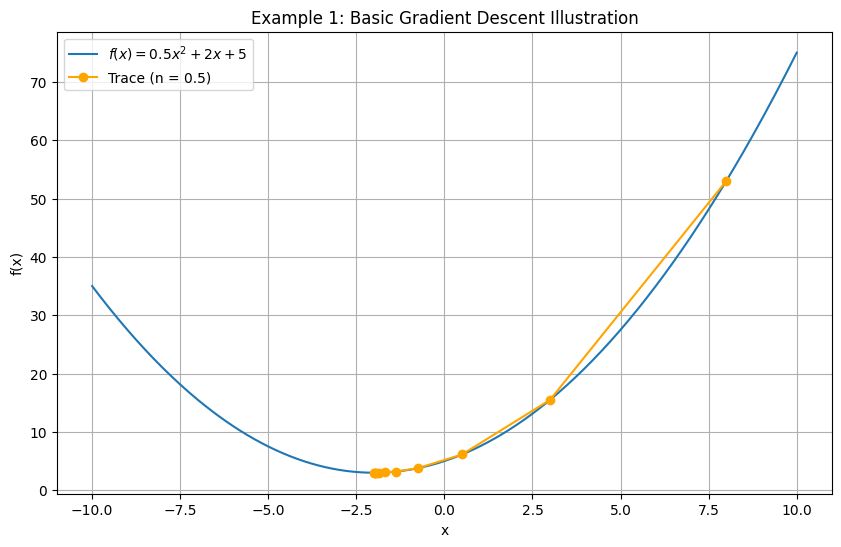

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Function to run Gradient Descent and return history (trace)
def gradient_descent(grad_f, initial_x, eta, n_iters=20):
    """
    Run gradient descent and return history of x points.
    grad_f: gradient function
    initial_x: starting point
    eta: learning rate
    n_iters: number of iterations
    """
    x = float(initial_x)
    history = [x]
    for _ in range(n_iters):
        x = x - eta * grad_f(x)
        history.append(x)
    return history

# --- Functions for Example 1 & 2 ---
# Function: f(x) = 0.5x^2 + 2x + 5
# (Convex parabola, minimum at f'(x) = x + 2 = 0 => x = -2)
def f1(x):
    return 0.5 * x**2 + 2 * x + 5

# Derivative: f'(x) = x + 2
def f1_grad(x):
    return x + 2

# --- Functions for Example 3 ---
# Function: f(x) = x^2 + 5*sin(x)
# (Non-convex function with multiple local minima)
def f2(x):
    return x**2 + 5 * np.sin(x)

# Derivative: f'(x) = 2x + 5*cos(x)
def f2_grad(x):
    return 2 * x + 5 * np.cos(x)

# --- Run Code & Plot Graphs ---

# Example 1: Basic GD
eta_basic = 0.5
initial_x_basic = 8.0
history_basic = gradient_descent(f1_grad, initial_x_basic, eta_basic, n_iters=10)

# --- Plot Graphs (Using Matplotlib) ---

# Graph 1: Basic GD
x_vals = np.linspace(-10, 10, 400)
y_vals = f1(x_vals)
plt.figure(figsize=(10, 6))
plt.plot(x_vals, y_vals, label='$f(x) = 0.5x^2 + 2x + 5$')
history_basic_vals = [f1(x) for x in history_basic]
plt.plot(history_basic, history_basic_vals, 'o-', label=f'Trace (n = {eta_basic})', color='orange')
plt.title('Example 1: Basic Gradient Descent Illustration')
plt.xlabel('x')
plt.ylabel('f(x)')
plt.legend()
plt.grid(True)
plt.savefig('gd_basic_new.png')

#### 2.2.5.b Ví dụ 2 - Ảnh hưởng của Learning Rate
Nếu đặt tốc độ học quá nhỏ, các giá trị cần tối ưu sẽ được cập nhật rất chậm, khiến thuật toán phải thực hiện nhiều vòng lặp hơn mới tiến gần đến lời giải tốt. Ví dụ dưới đây sẽ minh hoạ rõ điều này.

Chúng ta vẫn dùng hàm $f(x) = 0.5x^2 + 2x + 5$ và điểm bắt đầu $x_0 = 8.0$.

1.  **Trường hợp 1:** $\eta$ quá thấp ($\eta = 0.1$)

    - **Bước 0:** $x_0 = 8.0$

    - **Bước 1:** $x_1 = x_0 - \eta (x_0 + 2) = 8.0 - 0.1 \times (10.0) = 8.0 - 1.0 = 7.0$

    - **Bước 2:** $x_2 = x_1 - \eta (x_1 + 2) = 7.0 - 0.1 \times (9.0) = 7.0 - 0.9 = 6.1$

    - **Bước 3:** $x_3 = x_2 - \eta (x_2 + 2) = 6.1 - 0.1 \times (8.1) = 6.1 - 0.81 = 5.29$\
      \... (Tiếp tục lặp) \...

    - **Kết quả:** Sau 10 vòng lặp, $x_{10} \approx 1.14$.\

--- Code execution results ---
Example 2a (LR Low) - Ended at iteration 10: x = 1.486784400999999


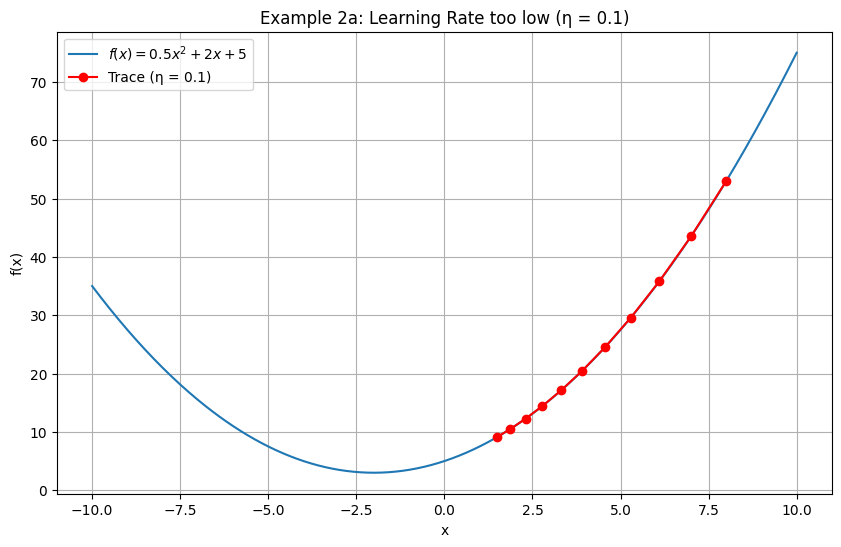

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Function to run Gradient Descent and return history (trace)
def gradient_descent(grad_f, initial_x, eta, n_iters=20):
    """
    Run gradient descent and return history of x points.
    grad_f: gradient function
    initial_x: starting point
    eta: learning rate
    n_iters: number of iterations
    """
    x = float(initial_x)
    history = [x]
    for _ in range(n_iters):
        x = x - eta * grad_f(x)
        history.append(x)
    return history

# --- Functions for Example 1 & 2 ---
# Function: f(x) = 0.5x^2 + 2x + 5
# (Convex parabola, minimum at f'(x) = x + 2 = 0 => x = -2)
def f1(x):
    return 0.5 * x**2 + 2 * x + 5

# Derivative: f'(x) = x + 2
def f1_grad(x):
    return x + 2

# --- Functions for Example 3 ---
# Function: f(x) = x^2 + 5*sin(x)
# (Non-convex function with multiple local minima)
def f2(x):
    return x**2 + 5 * np.sin(x)

# Derivative: f'(x) = 2x + 5*cos(x)
def f2_grad(x):
    return 2 * x + 5 * np.cos(x)

# --- Run Code & Plot Graphs ---

# Example 2a: LR too low
eta_low = 0.1
history_low = gradient_descent(f1_grad, initial_x_basic, eta_low, n_iters=10)


# --- Plot Graphs (Using Matplotlib) ---

# Graph 2a: Low LR
plt.figure(figsize=(10, 6))
plt.plot(x_vals, y_vals, label='$f(x) = 0.5x^2 + 2x + 5$')
history_low_vals = [f1(x) for x in history_low]
plt.plot(history_low, history_low_vals, 'o-', label=f'Trace (η = {eta_low})', color='red')
plt.title('Example 2a: Learning Rate too low (η = 0.1)')
plt.xlabel('x')
plt.ylabel('f(x)')
plt.legend()
plt.grid(True)
plt.savefig('gd_lr_low_new.png')

print("--- Code execution results ---")
print(f"Example 2a (LR Low) - Ended at iteration 10: x = {history_low[-1]}")

Như biểu đồ cho thấy, các bước đi (chấm đỏ) rất nhỏ. Sau 10 bước, $x \approx 1.14$, vẫn còn cách rất xa điểm tối ưu $x=-2$. Đây là trường hợp hội tụ chậm (slow convergence) do $\eta$ quá nhỏ

2.  **Trường hợp 2:** $\eta$ quá cao ($\eta = 2.5$)

    - **Bước 0:** $x_0 = 8.0$

    - **Bước 1:** $x_1 = x_0 - \eta (x_0 + 2) = 8.0 - 2.5 \times (10.0) = 8.0 - 25.0 = -17.0$

    - **Bước 2:** $x_2 = x_1 - \eta (x_1 + 2) = -17.0 - 2.5 \times (-17.0 + 2) = -17.0 - 2.5 \times (-15.0) = -17.0 + 37.5 = 20.5$

    - **Bước 3:** $x_3 = x_2 - \eta (x_2 + 2) = 20.5 - 2.5 \times (20.5 + 2) = 20.5 - 2.5 \times (22.5) = 20.5 - 56.25 = -35.75$\
      \... (Tiếp tục lặp) \...

    - **Kết quả:** Sau 10 vòng lặp, $x_{10} \approx 20.5$\

--- Code execution results ---
Example 2b (LR High) - Ended at iteration 10: x = 574.650390625


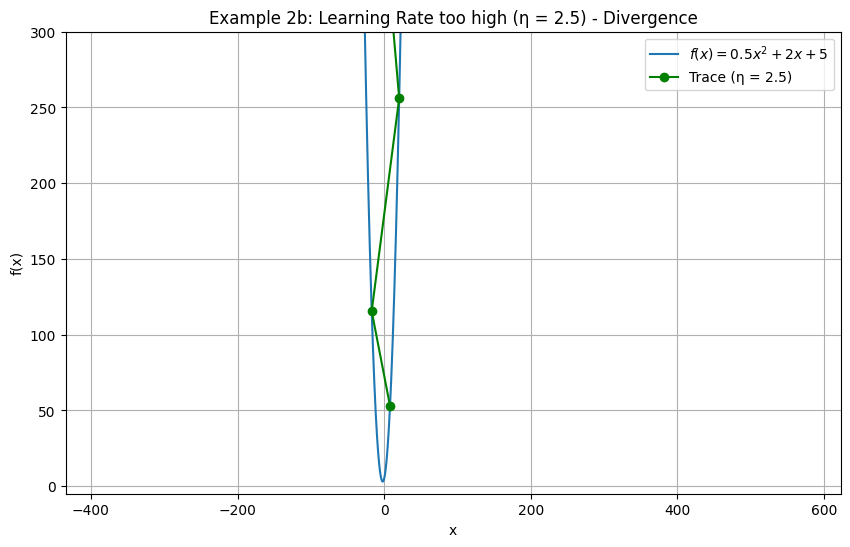

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Function to run Gradient Descent and return history (trace)
def gradient_descent(grad_f, initial_x, eta, n_iters=20):
    """
    Run gradient descent and return history of x points.
    grad_f: gradient function
    initial_x: starting point
    eta: learning rate
    n_iters: number of iterations
    """
    x = float(initial_x)
    history = [x]
    for _ in range(n_iters):
        x = x - eta * grad_f(x)
        history.append(x)
    return history

# --- Functions for Example 1 & 2 ---
# Function: f(x) = 0.5x^2 + 2x + 5
# (Convex parabola, minimum at f'(x) = x + 2 = 0 => x = -2)
def f1(x):
    return 0.5 * x**2 + 2 * x + 5

# Derivative: f'(x) = x + 2
def f1_grad(x):
    return x + 2

# --- Functions for Example 3 ---
# Function: f(x) = x^2 + 5*sin(x)
# (Non-convex function with multiple local minima)
def f2(x):
    return x**2 + 5 * np.sin(x)

# Derivative: f'(x) = 2x + 5*cos(x)
def f2_grad(x):
    return 2 * x + 5 * np.cos(x)

# --- Run Code & Plot Graphs ---

# Example 2b: LR too high
eta_high = 2.5
history_high = gradient_descent(f1_grad, initial_x_basic, eta_high, n_iters=10)


# --- Plot Graphs (Using Matplotlib) ---

# Graph 2b: High LR
# Need to adjust x,y axis as it diverges
x_vals_high = np.linspace(-30, 30, 400)
y_vals_high = f1(x_vals_high)
plt.figure(figsize=(10, 6))
plt.plot(x_vals_high, y_vals_high, label='$f(x) = 0.5x^2 + 2x + 5$')
history_high_vals = [f1(x) for x in history_high]
# Limit y-axis to clearly see divergence
plt.ylim(-5, 300)
plt.plot(history_high, history_high_vals, 'o-', label=f'Trace (η = {eta_high})', color='green')
plt.title('Example 2b: Learning Rate too high (η = 2.5) - Divergence')
plt.xlabel('x')
plt.ylabel('f(x)')
plt.legend()
plt.grid(True)
plt.savefig('gd_lr_high_new.png')


print("--- Code execution results ---")
print(f"Example 2b (LR High) - Ended at iteration 10: x = {history_high[-1]}")

Như biểu đồ minh họa, thuật toán đã \"nhảy\" qua điểm tối ưu $x=-2$ ngay ở bước đầu tiên (từ $x=8$ sang $x=-17$). Ở mỗi bước tiếp theo, nó \"văng\" ra xa hơn ($20.5$, $-35.75$, \...). Giá trị của $f(x)$ tăng vọt. Đây là trường hợp phân kỳ (divergence) do $\eta$ quá lớn

#### 2.2.5.c Ví dụ 3 - Gradient Descent Kẹt ở Local Minimum

Hàm số: $f(x) = x^2 + 5\sin(x)$. Hàm này có nhiều điểm cực tiểu. Nhìn vào biểu đồ, có một điểm cực tiểu toàn cục (global minimum) tại $x \approx -1.11$ và một điểm cực tiểu địa phương (local minimum) tại $x \approx 2.47$.

- Đạo hàm (Gradient): $f'(x) = 2x + 5\cos(x)$.

- Công thức cập nhật: $x_{t+1} = x_t - \eta(2x_t + 5\cos(x_t))$.

Chúng ta chọn điểm bắt đầu $x_0 = 4.0$ (gần local minimum) và $\eta = 0.1$.

- **Bước 0 (t=0):$x_0 = 4.0$**

- **Bước 1 (t=1):**

  - Tính gradient: $f'(x_0) = 2(4.0) + 5\cos(4.0) \approx 8.0 + 5(-0.654) =8.0 - 3.27 = 4.73$

  - Cập nhật $x$: $x_1 = 4.0 - 0.1 \times (4.73) = 4.0 - 0.473 = 3.527$

- **Bước 2 (t=2):**

  - Tính gradient: $f'(x_1) = 2(3.527) + 5\cos(3.527) \approx 7.054 + 5(-0.921) = 7.054 - 4.605 = 2.449$

  - Cập nhật $x$: $x_2 = 3.527 - 0.1 \times (2.449) = 3.527 - 0.245 = 3.282$

  \... (Tiếp tục lặp, $x$ đang hội tụ lại điểm $x=2.47$) \...

- Kết quả: Sau 20 vòng lặp, $x_{20} \approx 2.479$

--- Code execution results ---
Example 3 (Local Minima) - Ended at iteration 20: x = -0.49842684815245397


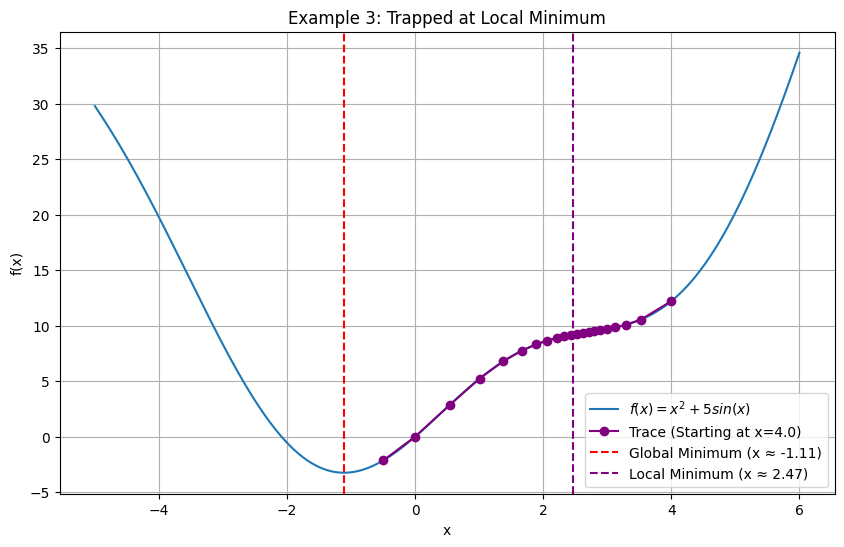

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Function to run Gradient Descent and return history (trace)
def gradient_descent(grad_f, initial_x, eta, n_iters=20):
    """
    Run gradient descent and return history of x points.
    grad_f: gradient function
    initial_x: starting point
    eta: learning rate
    n_iters: number of iterations
    """
    x = float(initial_x)
    history = [x]
    for _ in range(n_iters):
        x = x - eta * grad_f(x)
        history.append(x)
    return history

# --- Functions for Example 1 & 2 ---
# Function: f(x) = 0.5x^2 + 2x + 5
# (Convex parabola, minimum at f'(x) = x + 2 = 0 => x = -2)
def f1(x):
    return 0.5 * x**2 + 2 * x + 5

# Derivative: f'(x) = x + 2
def f1_grad(x):
    return x + 2

# --- Functions for Example 3 ---
# Function: f(x) = x^2 + 5*sin(x)
# (Non-convex function with multiple local minima)
def f2(x):
    return x**2 + 5 * np.sin(x)

# Derivative: f'(x) = 2x + 5*cos(x)
def f2_grad(x):
    return 2 * x + 5 * np.cos(x)

# --- Run Code & Plot Graphs ---

# Example 3: Local Minima
eta_local = 0.1
initial_x_local = 4.0
history_local = gradient_descent(f2_grad, initial_x_local, eta_local, n_iters=20)


# --- Plot Graphs (Using Matplotlib) ---
# Graph 3: Local Minima
x_vals_local = np.linspace(-5, 6, 400)
y_vals_local = f2(x_vals_local)
plt.figure(figsize=(10, 6))
plt.plot(x_vals_local, y_vals_local, label='$f(x) = x^2 + 5sin(x)$')
history_local_vals = [f2(x) for x in history_local]
plt.plot(history_local, history_local_vals, 'o-', label=f'Trace (Starting at x=4.0)', color='purple')
# Find global min (x ~ -1.1) and local min (x ~ 2.4)
global_min_x = -1.11
local_min_x = 2.47
plt.axvline(global_min_x, color='red', linestyle='--', label=f'Global Minimum (x ≈ {global_min_x})')
plt.axvline(local_min_x, color='purple', linestyle='--', label=f'Local Minimum (x ≈ {local_min_x})')
plt.title('Example 3: Trapped at Local Minimum')
plt.xlabel('x')
plt.ylabel('f(x)')
plt.legend()
plt.grid(True)
plt.savefig('gd_local_minima_new.png')

print("--- Code execution results ---")
print(f"Example 3 (Local Minima) - Ended at iteration 20: x = {history_local[-1]}")

Biểu đồ cho ta thấy rằng:

- Thuật toán bắt đầu tại $x=4.0$ (chấm tím).

- Nó đi xuống \"thung lũng\" gần nhất mà nó tìm thấy (local minimum, đường nét đứt màu tím) và bị kẹt lại ở đó khi gradient tiến về 0.

- Nó không có cách nào \"thoát\" ra khỏi thung lũng này để tìm đến thung lũng sâu hơn (global minimum, đường nét đứt màu đỏ).

Đây là điểm yếu của Gradient Descent: nó là một thuật toán \"tham lam\" và không có cơ chế khám phá, khiến nó dễ bị kẹt ở các điểm cực tiểu địa phương

## 2.3 Phương pháp Thích ứng

Vấn đề của GD là khó chọn $\eta$. Các phương pháp bậc hai sử dụng độ cong của hàm (đạo hàm bậc hai) để giải quyết vấn đề này

### 2.3.1 Phương pháp Newton (Newton's Method)

Trong Gradient Descent, chúng ta dùng xấp xỉ bậc một (tuyến tính - đường thẳng) của khai triển Taylor để tìm hướng đi.Trong Newton's Method, chúng ta dùng xấp xỉ bậc hai (toàn phương - đường parabol).

**Ý tưởng:** Thay vì xấp xỉ hàm số $f(x)$ bằng một đường thẳng (mặt phẳng), ta xấp xỉ nó bằng một cái bát (paraboloid) úp lên bề mặt hàm số tại điểm hiện tại. Đáy của cái bát đó chính là điểm chúng ta muốn nhảy tới.

Giả sử ta đang ở vị trí $x$ và muốn tìm một bước nhảy $\epsilon$ để đến vị trí mới $x + \epsilon$.

- **Bước 1:** Viết khai triển Taylor bậc 2 Công thức khai triển Taylor bậc 2 cho hàm nhiều biến là:
$$ f(x + \epsilon) \approx f(x) + \nabla f(x) \epsilon^T + \frac{1}{2} \epsilon^T H \epsilon$$

  Trong đó:
  - $f(x)$ là một con số (hằng số).

  - $\nabla f(x)$ là Gradient (vector đạo hàm bậc 1).

  - $H$ (hoặc $\nabla^2 f(x)$) là Ma trận Hessian (ma trận đạo hàm bậc 2). Ma trận này cho biết độ cong (curvature) của hàm số.

  - $\epsilon$ là đại lượng duy nhất thay đổi.

- **Bước 2:** Tìm cực tiểu của hàm xấp xỉ. Chúng ta muốn tìm $\epsilon$ để giá trị $f(x + \epsilon)$ là nhỏ nhất. Để làm điều này, ta lấy đạo hàm của biểu thức xấp xỉ trên theo $\epsilon$ và cho nó bằng 0.

  $$\frac{\partial}{\partial \epsilon} \left( f(x) + \nabla f(x)^T \epsilon + \frac{1}{2} \epsilon^T H \epsilon \right) = 0$$

  Đạo hàm của từng thành phần như sau:

  - Do $f(x)$ là hằng số nên đạo hàm của nó theo biến $\epsilon$ bằng 0

  - $\nabla f(x) \epsilon^T$: Đây là tích vô hướng của vector hằng số $a = \nabla f(x)$ và biến $\epsilon$. Dạng này giống như $ax$ trong hàm một biến, đạo hàm theo $x$ sẽ là $a$. Vậy: $$\frac{\partial}{\partial \epsilon} (\nabla f(x) \epsilon^T) = \nabla f(x)$$

  - $\frac{1}{2} \epsilon^T H \epsilon$: Đây là dạng toàn phương tương tự như $\frac{1}{2} h x^2$ trong hàm một biến (với $h$ là hằng số). Đạo hàm của $\frac{1}{2} h x^2$ là $hx$. Trong giải tích ma trận, công thức đạo hàm của dạng toàn phương $\epsilon^T H \epsilon$ là $(H + H^T)\epsilon$. Vì Hessian $H$ luôn là ma trận đối xứng (Symmetric Matrix) với các hàm liên tục bậc hai, nên $H^T = H$. Do đó đạo hàm là $2H\epsilon$. Kết hợp với hệ số $\frac{1}{2}$ ta thu được kết quả:

    $$\frac{\partial}{\partial \epsilon} \left( \frac{1}{2} \epsilon^T H \epsilon \right) = \frac{1}{2} (2H\epsilon) = H\epsilon$$

    Vậy ta có phương trình: $$\nabla f(x) + H \epsilon = 0$$

- **Bước 3:** Giải tìm bước nhảy $\epsilon$. Từ phương trình trên, ta chuyển vế: $$H \epsilon = -\nabla f(x)$$
Nhân cả hai vế với ma trận nghịch đảo của Hessian ($H^{-1}$): $$\epsilon = -H^{-1} \nabla f(x)$$

- **Bước 4:** Vậy, quy tắc cập nhật tham số của Newton's Method là: $$x_{t+1} = x_t - H^{-1} \nabla f(x_t)$$

Mặc dù lý về mặt lý thuyết rất hiệu quả, nhưng Newton's Method hiếm khi được dùng trực tiếp trong Deep Learning vì 3 lý do:

- **Chi phí tính toán cao:** Để tính bước nhảy, ta cần tính ma trận nghịch đảo $H^{-1}$.

  - Nếu mô hình có $d$ tham số (trong deep learning, $d$ có thể là hàng triệu, hàng tỷ).

  - Ma trận Hessian có kích thước $d \times d$ (lưu trữ $O(d^2)$ là quá tải bộ nhớ).

  - Chi phí tính nghịch đảo là $O(d^3)$. Với $d=1$ triệu là một con số khổng lồ

- **Vấn đề với hàm không lồi (Non-convex):** Trong Deep Learning, hàm mất mát thường lồi lõm phức tạp (non-convex). Nếu tại điểm $x$, hàm số đang cong xuống (như đỉnh núi thay vì thung lũng), Hessian $H$ sẽ không xác định dương. Khi đó, bước nhảy Newton sẽ dẫn ta lao lên\... đỉnh núi (cực đại) thay vì xuống đáy

- **Điểm yên ngựa (Saddle Points):** Tại điểm yên ngựa (gradient = 0 nhưng không phải cực tiểu), Newton's Method có thể bị kẹt hoặc hoạt động sai lệch.


Tuy không dùng Newton's Method nguyên bản, nhưng ý tưởng về \"độ cong\" (curvature) của nó được dùng để cải tiến Gradient Descent. Đây gọi là kỹ thuật **Preconditioning (Tiền điều kiện).**

#### Ví dụ

1.  **Ví dụ 1: Trường hợp Lý tưởng (Hội tụ bậc hai)** Đây là ví dụ minh họa sức mạnh của Newton's Method: khả năng hội tụ cực nhanh đối với các hàm lồi (convex).

    Tìm cực tiểu của hàm số bậc hai:$$f(x) = x^2 - 4x + 4$$ Đây là một hàm Parabol lồi hoàn hảo, có điểm cực tiểu toàn cục tại $x = 2$.

    Để thực hiện phương pháp Newton, ta cần tính thông tin bậc nhất (Gradient) và bậc hai (Hessian):

    - Gradient ($f'(x)$): $2x - 4$.

    - Hessian ($f''(x)$): $2$ (Là hằng số dương $\rightarrow$ Hàm luôn cong lên).

    Công thức cập nhật tại bước $t$:
    $$x_{t+1} = x_t - \frac{f'(x_t)}{f''(x_t)} = x_t - \frac{2x_t - 4}{2} = x_t - (x_t - 2) = 2$$
    Chúng ta thử nghiệm bắt đầu từ vị trí $x_0 = 10$ (cách rất xa cực tiểu).

    - Kết quả: Thuật toán hội tụ về $x=2.0$ ngay lập tức sau vòng lặp đầu tiên.

    - Kết luận: Đây là ưu điểm tuyệt đối của Newton's Method so với Gradient Descent (vốn phải mất hàng chục bước nhỏ mới về tới đích).

    <figure data-latex-placement="H">
    <div class="center">
    <img src="https://github.com/devthienphu/CST_Team_2_Report/blob/main/Images/GD/newton_1.png?raw=1" />
    </div>
    </figure>

2.  **Hàm Không Lồi** Đây là ví dụ minh họa rủi ro khi áp dụng Newton's Method cho hàm không lồi (non-convex), đặc biệt là gần điểm cực đại hoặc điểm yên ngựa. Tìm cực tiểu của hàm số không lồi:
$$f(x) = x^4 - 2x^2$$
    
  Hàm này có hình dạng chữ \"W\".
  - 2 Cực tiểu (Global Min) tại $x = -1$ và $x = 1$.
  - 1 Cực đại địa phương (Local Max) tại $x = 0$.
  Ta tính các đạo hàm:
  - Gradient ($f'(x)$): $4x^3 - 4x$
  - Hessian ($f''(x)$): $12x^2 - 4$

  Giả sử ta bắt đầu tại điểm $x_0 = 0.1$ (Rất gần điểm cực đại $x=0$). Tại $x_0 = 0.1$. Hessian $f''(0.1) = 12(0.01) - 4 = -3.88$.

  Giá trị Hessian bị âm ($f'' < 0$). Điều này có nghĩa là tại đây, hàm số đang \"úp xuống\" (concave down).Khi Hessian âm, phương pháp Newton sẽ xấp xỉ hàm số bằng một Parabol úp ngược (mở xuống dưới). Đỉnh của Parabol úp ngược này là một điểm cực đại. Do đó, thay vì đi xuống thung lũng tìm cực tiểu, bước nhảy Newton sẽ lao ngược lên đỉnh dốc để tìm cực đại.

  
  Chúng ta thử nghiệm bắt đầu từ $x_0 = 0.1$.

  - **Kết quả:** Giá trị $x$ cập nhật dần về $0$ ($0.1 \to -0.002 \to 0...$).

  - **Kết luận:** Thuật toán hội tụ về $x=0$. Nhưng $x=0$ là Cực Đại, không phải Cực Tiểu. Thuật toán đã thất bại trong việc tối ưu hóa (minimization). Đây là lý do Newton's Method nguy hiểm trong Deep Learning (nơi có rất nhiều điểm yên ngựa).

  <figure data-latex-placement="H">
  <div class="center">
  <img src="https://github.com/devthienphu/CST_Team_2_Report/blob/main/Images/GD/newton_2.png?raw=1" />
  </div>
  </figure>

### 2.3.2 Preconditioning

Như chúng ta đã phân tích, Phương pháp Newton thực sự là một phương pháp tối ưu \"thông minh\". Nó không chỉ nhìn vào độ dốc (Gradient - hướng đi) mà còn nhìn vào độ cong (Hessian - địa hình) để quyết định bước nhảy.Công thức cập nhật của Newton:
$$x_{t+1} = x_t - H^{-1} \nabla f(x_t)$$

Trong đó $H^{-1}$ là nghịch đảo của ma trận Hessian (ma trận đạo hàm bậc 2).Tuy nhiên, trong thực tế Deep Learning, sự hoàn hảo này đi kèm với những cái giá không thể trả nổi. Bên cạnh đó **Newton method** chỉ hoạt động tốt khi hàm số là hàm lồi như đã đề cập ở ví dụ của Newton Method.

Từ những điểm yếu trên, ý tưởng của Preconditioning ra đời như một sự thỏa hiệp thông minh. Thay vì dùng ma trận Hessian $H$ đầy đủ và đắt đỏ, ta có thể thay thế nó bằng một ma trận $P$ (Preconditioner) đơn giản hơn, dễ tính nghịch đảo hơn, mà vẫn giữ được thông tin về độ cong của hàm số. Cách chọn $P$ phổ biến nhất để khắc phục điểm yếu chi phí tính toán là chỉ lấy đường chéo của Hessian và bỏ qua tất cả các phần tử còn lại.

Thay vì dùng công thức Newton gốc:
$$x_{t+1} = x_t - \eta \underbrace{H^{-1}}_{\text{Quá đắt}} \nabla f(x_t)$$

Ta chuyển sang công thức Preconditioning:
$$x_{t+1} = x_t - \eta \underbrace{P^{-1}}_{\text{Rẻ \& Hiệu quả}} \nabla f(x_t)$$
Trong đó $P$ là ma trận tiền điều kiện (Preconditioner).

$$P \approx \text{diag}(H) = \begin{bmatrix}
h_{11} & 0 & \dots \\
0 & h_{22} & \dots \\
\dots & \dots & \dots
\end{bmatrix}$$

Nghịch đảo của ma trận chéo chỉ đơn giản là nghịch đảo từng phần tử trên đường chéo:
$$P^{-1} = \text{diag}\left(\frac{1}{h_{11}}, \frac{1}{h_{22}}, \dots\right)$$

Chi phí tính toán giảm từ $O(d^3)$ xuống $O(d)$.

Khi áp dụng Preconditioning chéo, công thức cập nhật cho từng tham số thứ $i$ trở thành:
$$x_i \leftarrow x_i - \frac{\eta}{h_{ii}} \cdot \nabla f(x_i)$$

Điều này có nghĩa là:

- Ta không dùng chung một Learning Rate $\eta$ cho tất cả.

- Mỗi tham số $x_i$ sẽ có một Learning Rate riêng là $\frac{\eta}{h_{ii}}$.

  - Nếu chiều nào rất cong/dốc ($h_{ii}$ lớn) $\rightarrow$ Chia cho số lớn $\rightarrow$ Bước đi nhỏ lại (để tránh bị văng/dao động).

  - Nếu chiều nào phẳng ($h_{ii}$ nhỏ) $\rightarrow$ Chia cho số nhỏ $\rightarrow$ Bước đi lớn lên (để đi nhanh hơn).

## 2.4 Giải bài tập

### Bài 1

**Bài 1: Thử nghiệm với learning rates và objective functions cho gradient descent**

1.  Ảnh hưởng của Learning Rate (Tốc độ học)\
    Chúng ta sử dụng hàm lồi đơn giản: $f(x) = x^4$\
    Đạo hàm: $f'(x) = 4x^3$
    

    Chúng ta xét 3 kịch bản với điểm xuất phát $x = 2$:

    - **LR quá nhỏ ($\eta = 0.001$):** Do $f'(2) = 32$, bước nhảy là $0.032$. Nhưng khi vào gần $x=1$, đạo hàm chỉ còn 4, bước nhảy còn $0.004$. Nó sẽ \"bò\" mãi không đến đích $0$.

    - **LR vừa vặn ($\eta = 0.05$):** Bước nhảy đầu tiên lớn để xuống dốc nhanh, sau đó nhỏ dần khi vào tâm.

    - **LR quá lớn ($\eta = 0.15$):** Tại $x=2$, đạo hàm là $32$. Bước nhảy: $0.15 \times 32 = 4.8$. Từ $2$ nó nhảy vọt sang $2 - 4.8 = -2.8$. Tại đây dốc càng đứng hơn, nó sẽ bị văng ra xa vô tận (Phân kỳ).

    <figure data-latex-placement="H">
    <div class="center">
    <img src="https://github.com/devthienphu/CST_Team_2_Report/blob/main/Images/GD/ex_1.png?raw=1" />
    </div>
    </figure>

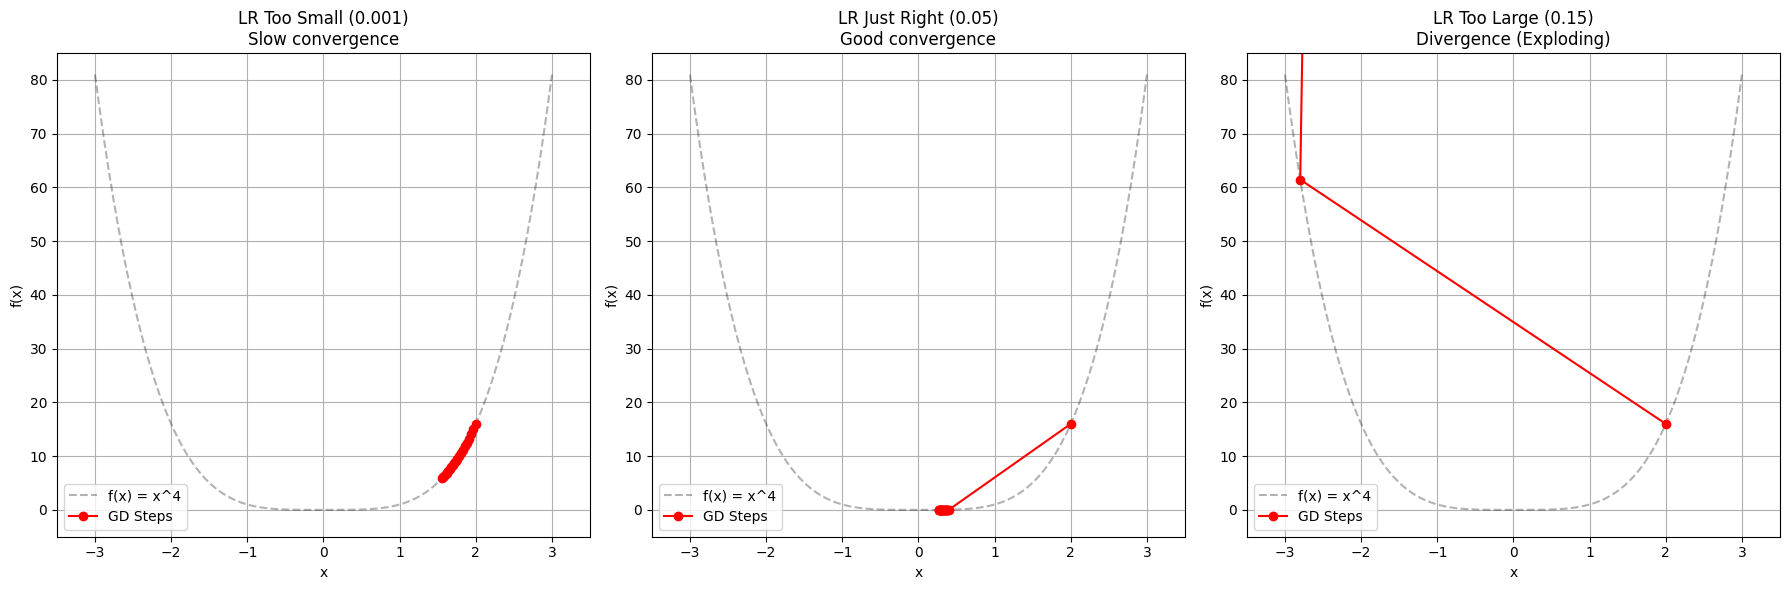

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# 1. Define function and derivative
def f_quartic(x):
    return x**4

def df_quartic(x):
    return 4 * x**3

# 2. Gradient Descent function
def gradient_descent(start_x, learning_rate, n_steps=20):
    x = start_x
    history = [x]
    for _ in range(n_steps):
        grad = df_quartic(x)
        x = x - learning_rate * grad

        # Stop if value becomes too large (to avoid plotting errors when diverging)
        if abs(x) > 5:
            history.append(x)
            break
        history.append(x)
    return np.array(history)

# 3. Setup parameters
start_x = 2.0
learning_rates = [0.001, 0.05, 0.15]
titles = ['LR Too Small (0.001)\nSlow convergence',
            'LR Just Right (0.05)\nGood convergence',
            'LR Too Large (0.15)\nDivergence (Exploding)']

# 4. Plot results
plt.figure(figsize=(18, 6))
x_range = np.linspace(-3, 3, 200)

for i, lr in enumerate(learning_rates):
    plt.subplot(1, 3, i+1)

    # Plot background function f(x)
    plt.plot(x_range, f_quartic(x_range), 'k--', alpha=0.3, label='f(x) = x^4')

    # Run GD
    path = gradient_descent(start_x, lr)

    # Plot path
    plt.plot(path, f_quartic(path), 'o-', color='red', label='GD Steps')

    # Decoration
    plt.title(titles[i])
    plt.xlabel('x')
    plt.ylabel('f(x)')
    plt.legend()
    plt.grid(True)

    # Fix view range for easy comparison (avoid third plot zooming out too far)
    plt.ylim(-5, 85)
    plt.xlim(-3.5, 3.5)

plt.tight_layout()
plt.show()

2.  Hàm không lồi (Non-convex) - Kẹt tại Local Minimum

    Ví dụ: Hàm $f(x) = x^4 - 2x^2 + 0.5x$

    - Đạo hàm (Gradient): $f'(x) = 4x^3 - 4x + 0.5$

    - **Global Minimum (Đáy biển - Mục tiêu):** $x \approx -1.06$ (Giá trị hàm rất thấp).

    - **Local Max (Đỉnh đồi ngăn cách):** $x \approx 0.12$ (Điểm cao nhất ở giữa).

    - **Local Minimum (Cái hố nông - Cái bẫy):** $x \approx 0.94$.

    Chúng ta chọn điểm bắt đầu $x_0 = 1.5$, chọn Learning Rate: $\eta = 0.1$. Các bước giải như sau:

    - Bước 1:

      - Vị trí hiện tại: $x_0 = 1.5$

      - Tính Gradient (Độ dốc): $$f'(1.5) = 4(1.5)^3 - 4(1.5) + 0.5$$
        $$f'(1.5) = 4(3.375) - 6 + 0.5$$
        $$f'(1.5) = 13.5 - 6 + 0.5 = \mathbf{8.0}$$

      - Cập nhật $x$: $$x_1 = x_0 - \eta \cdot f'(x_0)$$
        $$x_1 = 1.5 - 0.1 \cdot (8.0)$$
        $$x_1 = 1.5 - 0.8 = \mathbf{0.7}$$

    - Bước 2:

      - Vị trí hiện tại: $x_1 = 0.7$

      - Tính Gradient: $$f'(0.7) = 4(0.7)^3 - 4(0.7) + 0.5$$
        $$f'(0.7) = 4(0.343) - 2.8 + 0.5$$
        $$f'(0.7) = 1.372 - 2.8 + 0.5 = \mathbf{-0.928}$$

      - Cập nhật $x$: $$x_2 = 0.7 - 0.1 \cdot (-0.928)$$
        $$x_2 = 0.7 + 0.0928 = \mathbf{0.7928}$$

    - Bước 3:

      - Vị trí hiện tại: $x_2 \approx 0.793$

      - Tính Gradient: $$f'(0.793) = 4(0.793)^3 - 4(0.793) + 0.5$$
        $$f'(0.793) \approx 4(0.498) - 3.172 + 0.5$$
        $$f'(0.793) \approx 1.992 - 3.172 + 0.5 = \mathbf{-0.68}$$

      - Cập nhật $x$: $$x_3 = 0.7928 - 0.1 \cdot (-0.68)$$
        $$x_3 = 0.7928 + 0.068 = \mathbf{0.8608}$$

    Hãy nhìn vào dãy số vị trí $x$ qua các bước:
    $$1.5 \rightarrow 0.7 \rightarrow 0.79 \rightarrow 0.86 \rightarrow 0.90 \rightarrow \dots$$
    Nó đang tiến dần về 0.94. Đây chính là Local Minimum. Global Minimum nằm ở -1.06. Để đến được đó, $x$ phải nhỏ hơn 0.12 (đỉnh ngọn đồi ngăn cách). Nhưng ở Bước 1, nó nhảy từ 1.5 xuống thấp nhất là 0.7. Tại 0.7, gradient đã âm (dốc ngược), bắt nó phải quay đầu lại hướng dương. Chính vì thế, thuật toán không bao giờ có cơ hội vượt qua con số 0.7 để đi xuống vùng số âm. Nó đã bị kẹt hoàn toàn trong thung lũng bên phải.

    <figure data-latex-placement="H">
    <div class="center">
    <img src="https://github.com/devthienphu/CST_Team_2_Report/blob/main/Images/GD/ex_2.png?raw=1" />
    </div>
    </figure>

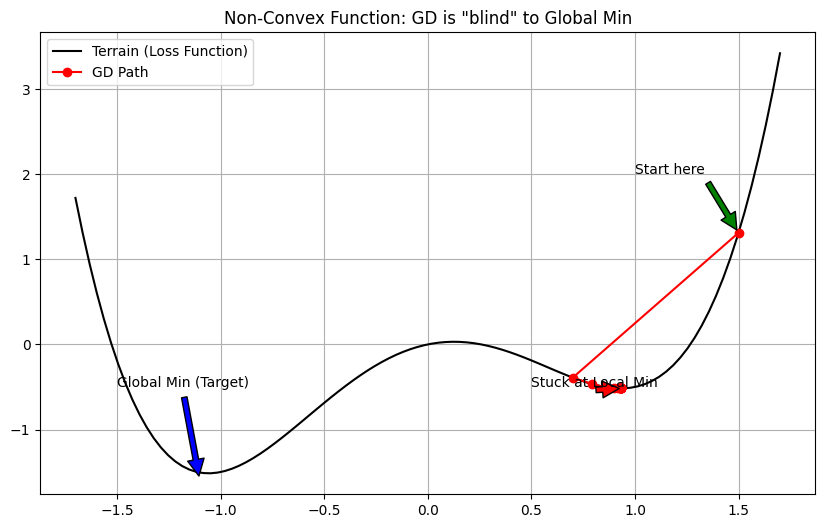

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

def f_non_convex(x):
    return x**4 - 2*x**2 + 0.5*x

def df_non_convex(x):
    return 4*x**3 - 4*x + 0.5

# Setup Gradient Descent
def gradient_descent_log(start_x, lr, steps):
    x = start_x
    path = [x]
    for _ in range(steps):
        grad = df_non_convex(x)
        x = x - lr * grad
        path.append(x)
    return np.array(path)

# Test run
start_x = 1.5 # Risky starting point
path = gradient_descent_log(start_x, lr=0.1, steps=20)

# Plot
x = np.linspace(-1.7, 1.7, 100)
plt.figure(figsize=(10, 6))
plt.plot(x, f_non_convex(x), 'k-', label='Terrain (Loss Function)')
plt.plot(path, f_non_convex(path), 'ro-', label='GD Path')

# Annotations
plt.annotate('Start here', xy=(1.5, f_non_convex(1.5)), xytext=(1, 2),
                arrowprops=dict(facecolor='green', shrink=0.05))
plt.annotate('Stuck at Local Min', xy=(path[-1], f_non_convex(path[-1])), xytext=(0.5, -0.5),
                arrowprops=dict(facecolor='red', shrink=0.05))
plt.annotate('Global Min (Target)', xy=(-1.1, -1.6), xytext=(-1.5, -0.5),
                arrowprops=dict(facecolor='blue', shrink=0.05))

plt.title('Non-Convex Function: GD is "blind" to Global Min')
plt.grid(True)
plt.legend()
plt.show()

### Bài 2

**Đề bài:** Cài đặt thuật toán tìm kiếm theo đường thẳng (line search) để cực tiểu hóa một hàm lồi trong khoảng $[a, b]$.

1.  Bạn có cần đạo hàm (derivatives) cho tìm kiếm nhị phân (binary search) không? Tức là, để quyết định xem nên chọn nửa khoảng bên trái $[a, (a+b)/2]$ hay nửa khoảng bên phải $[(a+b)/2, b]$.

2.  Tốc độ hội tụ của thuật toán này nhanh đến mức nào?

3.  Cài đặt thuật toán và áp dụng nó để tìm cực tiểu của hàm số: $\log(\exp(x) + \exp(-2x - 3))$.

- **Câu 2.1: Có cần đạo hàm cho Binary Search không?**\
  Có, chúng ta sẽ cần đạo hàm cho tìm kiểm nhị phân. Thuật toán tìm kiếm nhị phân (Binary Search) hoạt động bằng cách chia đôi khoảng $[a, b]$ tại điểm giữa $m = \frac{a+b}{2}$.

  - Nếu ta KHÔNG dùng đạo hàm: T chỉ biết giá trị $f(a), f(m), f(b)$.\
    Ví dụ: $f(a)=10, f(m)=5, f(b)=10$. Ta không thể biết đáy vực nằm ở bên trái hay bên phải $m$. Cả hai bên đều có khả năng chứa điểm cực tiểu.

  - Nếu có dùng đạo hàm ($f'(m)$): Ta tính đạo hàm tại điểm giữa $m$.

    - Nếu $f'(m) > 0$ (Dương): Hàm số đang tăng tại $m$ $\rightarrow$ Đáy vực phải nằm bên TRÁI ($x < m$).

    - Nếu $f'(m) < 0$ (Âm): Hàm số đang giảm tại $m$ $\rightarrow$ Đáy vực phải nằm bên PHẢI ($x > m$).

    - Nếu $f'(m) = 0$: $m$ chính là đáy vực.

  **Kết luận:** Để loại bỏ một nửa khoảng chỉ dựa trên 1 điểm chia (như Binary Search), ta bắt buộc phải biết dấu của đạo hàm.

- **Câu 2.2: Tốc độ hội tụ nhanh thế nào?**\
  Tốc độ hội tụ sẽ là tuyến tính. Tốc độ hội tụ được đo bằng việc khoảng tìm kiếm bị thu hẹp bao nhiêu sau mỗi bước.

  - Nếu dùng Binary Search (với đạo hàm): Sau mỗi bước, khoảng tìm kiếm giảm đi một nửa ($1/2 = 0.5$).

  - Công thức sai số: $|x_{k+1} - x^*| \approx 0.5 \cdot |x_k - x^*|$.

  - Đây gọi là tốc độ hội tụ tuyến tính (bậc 1). Nó nhanh hơn \"mò mẫm\" nhưng chậm hơn nhiều so với phương pháp Newton (hội tụ bậc 2).

- **Câu 2.3: Giải bài toán cực tiểu hóa hàm số**\
  Hàm số: $f(x) = \log(e^x + e^{-2x - 3})$. Để tìm cực tiểu, ta tính đạo hàm $f'(x)$ và cho nó bằng 0.

  - Tính đạo hàm: Áp dụng công thức $(\log u)' = \frac{u'}{u}$:
    $$u = e^x + e^{-2x - 3}$$
    $$u' = e^x + e^{-2x - 3} \cdot (-2) = e^x - 2e^{-2x - 3}$$
    
    **Vậy:**
    $$f'(x) = \frac{e^x - 2e^{-2x - 3}}{e^x + e^{-2x - 3}}$$

  - Giải phương trình $f'(x) = 0$: Để phân số bằng 0, tử số phải bằng 0:
    $$e^x - 2e^{-2x - 3} = 0$$
    
    $$e^x = 2e^{-2x - 3}$$
    
    **Lấy logarit tự nhiên ($\ln$) hai vế:**
    $$\ln(e^x) = \ln(2 \cdot e^{-2x - 3})$$
    
    $$x = \ln(2) + \ln(e^{-2x - 3})$$
    
    $$x = \ln(2) + (-2x - 3)$$
    
    $$x = 0.6931 - 2x - 3$$
    
    **Chuyển vế $x$:** $$x + 2x = 0.6931 - 3$$
    $$3x = -2.3069$$
    
    $$x = \frac{-2.3069}{3} \approx -0.7689$$
    
    **Đáp án:** $x \approx -0.769$

- Mô phỏng thuật toán binary search trên đạo hàm
  
  Giả sử ta chọn khoảng tìm kiếm ban đầu $[a, b] = [-1, 0]$ (vì ta đoán nghiệm nằm trong này).

  - Tính đạo hàm $f'(m)$ tại giữa.

  - Nếu $f'(m) > 0$ $\rightarrow$ Chọn nửa trái $[a, m]$.

  - Nếu $f'(m) < 0$ $\rightarrow$ Chọn nửa phải $[m, b]$.

  **Vòng lặp 1**

  - Khoảng: $[-1, 0]$.

  - Điểm giữa $m = -0.5$.

  - Tính đạo hàm tại $-0.5$:
    $$f'(-0.5) = \frac{e^{-0.5} - 2e^{-2(-0.5) - 3}}{...} = \frac{0.606 - 2e^{-2}}{...} = \frac{0.606 - 2(0.135)}{...} = \frac{0.606 - 0.27}{...} > 0$$

  - Vì $f'(-0.5) > 0$ (Dương): Hàm đang tăng, đáy vực nằm bên trái $\rightarrow$ Khoảng mới: $[-1, -0.5]$.

  **Vòng lặp 2**

  - Khoảng: $[-1, -0.5]$.

  - Điểm giữa $m = -0.75$.

  - Tính đạo hàm tại $-0.75$:
    $$f'(-0.75) = \frac{e^{-0.75} - 2e^{-2(-0.75) - 3}}{...} = \frac{e^{-0.75} - 2e^{-1.5}}{...} = \frac{0.472 - 2(0.223)}{...} = \frac{0.472 - 0.446}{...} > 0$$

  - Vẫn dương (nhưng đã nhỏ hơn vòng 1). Đáy vực vẫn nằm bên trái. $\rightarrow$ Khoảng mới: $[-1, -0.75]$.

  **Vòng lặp 3**

  - Khoảng: $[-1, -0.75]$.

  - Điểm giữa $m = -0.875$.

  - Tính đạo hàm tại $-0.875$:
    $$f'(-0.875) = \frac{e^{-0.875} - 2e^{-1.25}}{...} = \frac{0.417 - 2(0.286)}{...} = \frac{0.417 - 0.572}{...} < 0$$

  - Do $f'(-0.875) < 0$ Hàm đang giảm, đáy vực nằm bên phải. $\rightarrow$ Khoảng mới: $[-0.875, -0.75]$.

  Kết quả sau 3 bước: Nghiệm nằm trong khoảng $[-0.875, -0.75]$. Điểm giữa lúc này là $-0.8125$. Hàm đang tiến rất gần về đáp án chính xác **-0.769.**

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# 1. Define the objective function f(x)
def f(x):
    return np.log(np.exp(x) + np.exp(-2*x - 3))

# 2. Define the derivative f'(x)
# DERIVATIVE IS REQUIRED to use Binary Search (as explained in question 2.1)
def df(x):
    # Numerator: e^x - 2*e^(-2x - 3)
    numerator = np.exp(x) - 2 * np.exp(-2*x - 3)
    # Denominator: e^x + e^(-2x - 3)
    denominator = np.exp(x) + np.exp(-2*x - 3)
    return numerator / denominator

# 3. Binary Search Algorithm (Line Search using derivative)
def binary_line_search(grad_func, a, b, tol=1e-4):
    """
    Find the root of f'(x) = 0 in the interval [a, b] using bisection method.
    grad_func: Function to compute the derivative
    """
    steps = 0
    history = []

    # Check the sign of derivatives at both endpoints
    # If both derivatives have the same sign, there may be no minimum or multiple minima.
    if grad_func(a) * grad_func(b) >= 0:
        print("Warning: Derivatives at a and b have the same sign. Method may not converge correctly.")

    mid = (a + b) / 2

    while abs(b - a) > tol:
        steps += 1
        mid = (a + b) / 2
        history.append(mid)

        gradient = grad_func(mid)

        if gradient == 0: # Lucky to hit the target directly
            break
        elif gradient > 0:
            # Positive derivative -> Function is increasing -> Minimum is on the LEFT
            b = mid
        else:
            # Negative derivative -> Function is decreasing -> Minimum is on the RIGHT
            a = mid

    return mid, steps, history

# 4. Run the experiment
# Choose interval [-2, 2]
min_x, steps, path = binary_line_search(df, -2, 2)

# Theoretical value (calculated in previous steps)
exact_x = (np.log(2) - 3) / 3

print(f"--- BINARY SEARCH (BISECTION) RESULTS ---")
print(f"Number of iterations: {steps}")
print(f"Found x value: {min_x:.6f}")
print(f"Exact value:   {exact_x:.6f}")
print(f"Error: {abs(min_x - exact_x):.8f}")

# 5. Plot illustration of derivative converging to 0
x_vals = np.linspace(-2, 2, 100)
df_vals = df(x_vals)

--- BINARY SEARCH (BISECTION) RESULTS ---
Number of iterations: 16
Found x value: -0.768982
Exact value:   -0.768951
Error: 0.00003099


### Bài 3

**Đề bài:** Thiết kế một hàm mục tiêu xác định trên không gian $\mathbb{R}^2$ (hàm 2 biến số) sao cho thuật toán Gradient Descent chạy cực kỳ chậm. Gợi ý: Tỷ lệ (scale) các tọa độ khác nhau thật khác biệt.

**Ý tưởng:** Gradient Descent (GD) đi xuống đồi theo hướng dốc nhất. Nếu quả đồi bị kéo dãn (giống một cái lòng máng hoặc thung lũng hẹp dài), hướng dốc nhất thường vuông góc với thung lũng chứ không hướng về đích $\rightarrow$ GD sẽ bị nảy qua nảy lại (ziczac) giữa hai vách núi và tiến rất chậm về đích.

- **Bước 1:** Chọn hàm số. Ta chọn một hàm bậc 2 đơn giản nhưng có hệ số (scale) giữa $x$ và $y$ chênh lệch rất lớn.
  $$f(x, y) = x^2 + 1000y^2$$

  - Hệ số của $x$ là $1$.

  - Hệ số của $y$ là $1000$.

- **Bước 2:** Tính đạo hàm (Gradient)
  $$\nabla f(x, y) = \begin{bmatrix} \frac{\partial f}{\partial x} \\ \frac{\partial f}{\partial y} \end{bmatrix} = \begin{bmatrix} 2x \\ 2000y \end{bmatrix}$$
  Đạo hàm theo hướng $y$ lớn gấp 1000 lần đạo hàm theo hướng $x$.

- **Bước 2:** Chọn điểm xuất phát. Giả sử ta bắt đầu tại điểm $x_0 = 10, y_0 = 1$.

  - Gradient tại đó: $\nabla f = [20, 2000]^T$.

  - Hướng dốc chủ yếu nằm dọc theo trục $y$.

- **Bước 3:** Cập nhật gradient\
  Quy tắc cập nhật:
  $\mathbf{x}_{new} = \mathbf{x}_{old} - \eta \nabla f$. Chúng ta có 2
  lựa chọn

  - Chọn $\eta$ lớn (ví dụ $\eta = 0.1$) để $x$ đi nhanh.

    - Cập nhật $x$: $x_{new} = 10 - 0.1(20) = 8$. (Tốt, tiến về đích 0 khá nhanh).

    - Cập nhật $y$: $y_{new} = 1 - 0.1(2000) = 1 - 200 = -199$.

    - Kết quả: $y$ bị văng từ $1$ sang $-199$. Thuật toán bị phân kỳ vì bước nhảy theo trục $y$ quá lớn.

  - Chọn $\eta$ nhỏ (ví dụ $\eta = 0.0005$)

    - Để thuật toán ổn định, $\eta$ phải nhỏ hơn $2 / \lambda_{max}$
      (với $\lambda_{max} = 2000$ là độ cong lớn nhất). Vậy chọn
      $\eta = 0.0005$.

    - Cập nhật $y$: $y_{new} = 1 - 0.0005(2000) = 1 - 1 = 0$. (Tốt, $y$ về đích ngay).

    - Cập nhật $x$: $x_{new} = 10 - 0.0005(20) = 10 - 0.01 = 9.99$.

    - Sau 1 bước, $x$ chỉ giảm từ $10$ xuống $9.99$. Để $x$ về được $0$, ta cần hàng ngàn, thậm chí hàng triệu bước lặp.

  **Kết luận:** Vì phải chọn Learning Rate cực nhỏ để chiều dốc đứng ($y$) không bị văng, nên chiều thoải ($x$) di chuyển cực kỳ chậm chạp.

  <figure data-latex-placement="H">
  <div class="center">
  <img src="https://github.com/devthienphu/CST_Team_2_Report/blob/main/Images/GD/ex_3.png?raw=1" />
  </div>
  </figure>

Starting point: [10.  1.]
Point after 20 steps: [9.64609002 0.01152922]
Observation: y is close to 0, but x is still stuck at ~9.6 (almost unchanged)


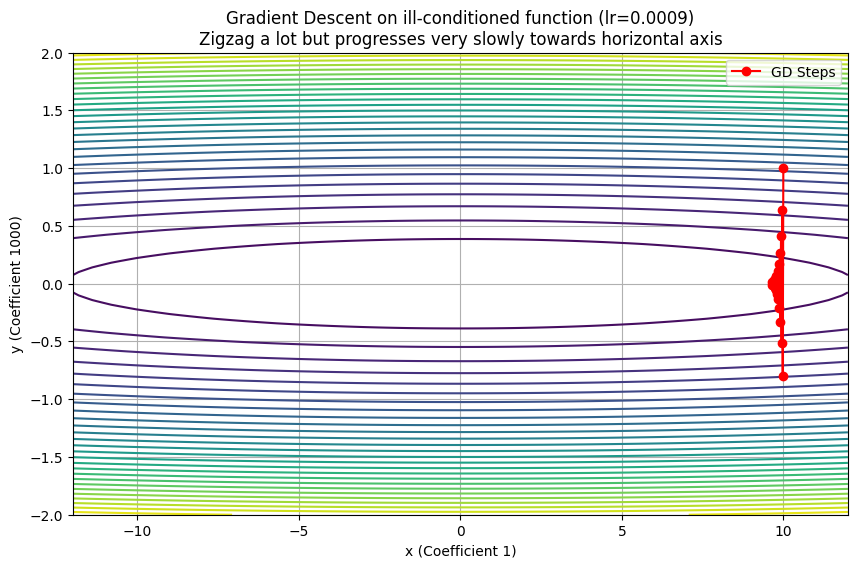

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# 1. Define the "ill-conditioned" function
def f(x):
    # x[0] is horizontal axis (small scale), x[1] is vertical axis (large scale)
    return x[0]**2 + 1000 * x[1]**2

def grad_f(x):
    return np.array([2*x[0], 2000*x[1]])

# 2. Gradient Descent Algorithm
def gradient_descent(start_x, lr, steps):
    path = [start_x]
    x = start_x
    for _ in range(steps):
        grad = grad_f(x)
        x = x - lr * grad
        path.append(x)
    return np.array(path)

# 3. Run experiment
# Choose small Learning Rate to avoid explosion (Divergence)
lr = 0.0009
start_x = np.array([10.0, 1.0])
path = gradient_descent(start_x, lr, steps=20)

# 4. Plot figure
plt.figure(figsize=(10, 6))

# Create grid points to draw Contour
x_grid = np.linspace(-12, 12, 100)
y_grid = np.linspace(-2, 2, 100) # Y axis is very short compared to X
X, Y = np.meshgrid(x_grid, y_grid)
Z = X**2 + 1000 * Y**2

# Draw contour lines
plt.contour(X, Y, Z, levels=30, cmap='viridis')

# Draw GD path
plt.plot(path[:, 0], path[:, 1], 'ro-', label='GD Steps')
plt.title(f'Gradient Descent on ill-conditioned function (lr={lr})\nZigzag a lot but progresses very slowly towards horizontal axis')
plt.xlabel('x (Coefficient 1)')
plt.ylabel('y (Coefficient 1000)')
plt.legend()
plt.grid(True)

# Print start and end coordinates
print(f"Starting point: {path[0]}")
print(f"Point after 20 steps: {path[-1]}")
print("Observation: y is close to 0, but x is still stuck at ~9.6 (almost unchanged)")

plt.show()

### Bài 4

**Đề bài:** Triển khai phiên bản \"nhẹ\" (lightweight) của phương pháp Newton sử dụng kỹ thuật tiền điều kiện (preconditioning):

1.  Sử dụng đường chéo của ma trận Hessian làm bộ tiền điều kiện.

2.  Sử dụng giá trị tuyệt đối của đường chéo đó thay vì giá trị thực (có thể mang dấu âm).

3.  Áp dụng thuật toán này cho bài toán ở câu trên (Bài 3: hàm $f(x,y) = x^2 + 1000y^2$).

**Ý tưởng:** Phương pháp Newton, Newton's Method cập nhật bằng công thức:
$$\mathbf{x}_{new} = \mathbf{x} - \mathbf{H}^{-1} \nabla f(\mathbf{x})$$

Trong đó $\mathbf{H}^{-1}$ là nghịch đảo của ma trận Hessian (ma trận độ cong). Ma trận này giúp \"chuẩn hóa\" độ dốc, biến hình Ellipse dài ngoằng thành hình tròn. Tuy nhiên, tính nghịch đảo ma trận $\mathbf{H}$ rất tốn kém ($O(N^3)$).\
Thay vì dùng cả ma trận $\mathbf{H}$, ta giả sử các biến độc lập nhau, chỉ quan tâm đến đường chéo chính (độ cong riêng của từng biến).\
Với hàm $f(x, y) = x^2 + 1000y^2$:

- Đạo hàm bậc 1 (Gradient): $g = [2x, 2000y]^T$

- Đạo hàm bậc 2 (Hessian):

  - Theo $x$: $\frac{\partial^2 f}{\partial x^2} = 2$

  - Theo $y$: $\frac{\partial^2 f}{\partial y^2} = 2000$

- Vector Hessian đường chéo: $h = [2, 2000]$

**Quy tắc cập nhật mới:** Thay vì trừ đi $\eta \cdot g$, ta trừ đi $\eta \cdot \frac{g}{|h|}$. Tức là ta chia Learning Rate riêng cho từng chiều dựa trên độ dốc của chiều đó.

- Chiều nào dốc ($h$ lớn) $\rightarrow$ Bước nhảy nhỏ lại.

- Chiều nào thoải ($h$ nhỏ) $\rightarrow$ Bước nhảy to ra.

<!-- -->

- **Bước 1:** Giả sử ta đứng tại vị trí:
  $$\mathbf{x}_0 = \begin{bmatrix} 10 \\ 1 \end{bmatrix}$$

- **Bước 2:** Tính Vector Gradient ($\nabla f$)

  - Đạo hàm theo $x$: $\frac{\partial f}{\partial x} = 2x$

  - Đạo hàm theo $y$: $\frac{\partial f}{\partial y} = 2000y$

  Tại điểm $(10, 1)$, ta thay số vào:
  $$\nabla f(\mathbf{x}_0) = \begin{bmatrix} 2(10) \\ 2000(1) \end{bmatrix} = \begin{bmatrix} 20 \\ 2000 \end{bmatrix}$$

- **Bước 3:** Tính Ma trận Hessian ($H$) và Preconditioner ($P$)\ Hessian cho biết độ cong của hàm số.

  - Đạo hàm bậc 2 theo $x$: $\frac{\partial^2 f}{\partial x^2} = 2$

  - Đạo hàm bậc 2 theo $y$: $\frac{\partial^2 f}{\partial y^2} = 2000$

  - Đạo hàm chéo: $0$

  Ma trận Hessian đầy đủ là:
  $$H = \begin{bmatrix} 2 & 0 \\ 0 & 2000 \end{bmatrix}$$
  
  Theo đề bài, ta dùng Preconditioner $P$ là đường chéo của $H$ và lấy giá trị tuyệt đối:
  $$P = \begin{bmatrix} |2| & 0 \\ 0 & |2000| \end{bmatrix} = \begin{bmatrix} 2 & 0 \\ 0 & 2000 \end{bmatrix}$$

- **Bước 4:** Tính nghịch đảo của Preconditioner ($P^{-1}$) Vì $P$ là ma trận đường chéo, nghịch đảo của nó rất dễ (chỉ cần lấy 1 chia cho từng phần tử trên đường chéo):
  $$P^{-1} = \begin{bmatrix} \frac{1}{2} & 0 \\ 0 & \frac{1}{2000} \end{bmatrix}$$

- **Bước 5:** Tính bước nhảy điều chỉnh ($\Delta \mathbf{x}$)\
  Ta nhân nghịch đảo độ cong với gradient để chuẩn hóa bước đi.
  $$\Delta \mathbf{x} = P^{-1} \cdot \nabla f(\mathbf{x}_0)$$
  
  Thực hiện phép nhân ma trận với vector:
  $$\Delta \mathbf{x} = \begin{bmatrix} \frac{1}{2} & 0 \\ 0 & \frac{1}{2000} \end{bmatrix} \begin{bmatrix} 20 \\ 2000 \end{bmatrix}$$
  
  Vậy vector bước nhảy là:
  $$\Delta \mathbf{x} = \begin{bmatrix} 10 \\ 1 \end{bmatrix}$$

- **Bước 5:** Cập nhật vị trí mới ($\mathbf{x}_1$)\
  Sử dụng công thức Newton (với Learning Rate $\eta = 1$):
  $$\mathbf{x}_1 = \mathbf{x}_0 - \Delta \mathbf{x}$$
  
  Thay số:
  $$\mathbf{x}_1 = \begin{bmatrix} 10 \\ 1 \end{bmatrix} - \begin{bmatrix} 10 \\ 1 \end{bmatrix} = \begin{bmatrix} 0 \\ 0 \end{bmatrix}$$
  
  Vị trí mới: $(0, 0)$. Đây là Global Minimum (đáy) của hàm số.

  <figure data-latex-placement="H">
  <div class="center">
  <img src="https://github.com/devthienphu/CST_Team_2_Report/blob/main/Images/GD/ex_4.png?raw=1" />
  </div>
  </figure>

Starting position: [10.  1.]
Position after step 1: [5.00000006e-08 4.99988939e-12]


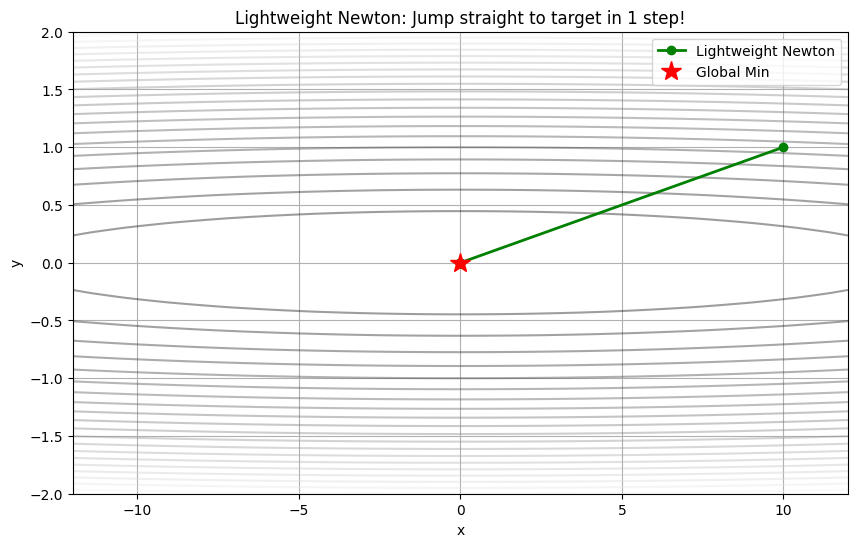

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# 1. Redefine the "nasty" function from Exercise 3
def f(x):
    return x[0]**2 + 1000 * x[1]**2

def grad(x):
    return np.array([2*x[0], 2000*x[1]])

def hessian_diag(x):
    # Second derivative with respect to x is 2
    # Second derivative with respect to y is 2000
    # Constant function, does not depend on position x
    return np.array([2.0, 2000.0])

# 2. Lightweight Newton Algorithm
def lightweight_newton(start_x, lr=1.0, steps=10):
    path = [start_x]
    x = start_x.copy()

    for _ in range(steps):
        g = grad(x)
        h = hessian_diag(x)

        # Problem requirement: Use absolute value of diagonal Hessian
        # Add 1e-8 to avoid division by 0 if Hessian = 0
        preconditioner = 1.0 / (np.abs(h) + 1e-8)

        # Update: x = x - lr * (H^-1 * g)
        # Since H is diagonal, H^-1 * g is equivalent to element-wise multiplication preconditioner * g
        x = x - lr * (preconditioner * g)

        path.append(x)

    return np.array(path)

# 3. Experiment setup
start_x = np.array([10.0, 1.0])

# Run algorithm
# Note: Newton method converges extremely fast, so usually choose lr=1.0
path_newton = lightweight_newton(start_x, lr=1.0, steps=5)

# 4. Manual calculation for verification (Math Check)
# At x=[10, 1]:
# Grad = [20, 2000]
# Hess = [2, 2000]
# Step = Grad / Hess = [10, 1]
# New position = [10, 1] - [10, 1] = [0, 0]
print("Starting position:", start_x)
print("Position after step 1:", path_newton[1])

# 5. Plotting
plt.figure(figsize=(10, 6))

# Draw Contour
x_grid = np.linspace(-12, 12, 100)
y_grid = np.linspace(-2, 2, 100)
X, Y = np.meshgrid(x_grid, y_grid)
Z = X**2 + 1000 * Y**2
plt.contour(X, Y, Z, levels=20, cmap='gray', alpha=0.4)

# Draw Newton path
plt.plot(path_newton[:, 0], path_newton[:, 1], 'go-', linewidth=2, label='Lightweight Newton')
# Draw target point
plt.plot(0, 0, 'r*', markersize=15, label='Global Min')

plt.title('Lightweight Newton: Jump straight to target in 1 step!')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.grid(True)
plt.show()

### Bài 5

**Đề bài:** Áp dụng thuật toán trên (Lightweight Newton) cho một số hàm mục tiêu (lồi hoặc không lồi). Điều gì sẽ xảy ra nếu bạn xoay hệ tọa độ đi 45 độ?

Ở Bài 4, thuật toán \"Lightweight Newton\" hoạt động (1 bước về đích) là nhờ một sự trùng hợp may mắn: Các trục của hình Ellipse trùng khớp với\ các trục tọa độ (x, y).

Điều này có nghĩa là biến $x$ và $y$ độc lập (uncorrelated). Ma trận Hessian là ma trận đường chéo (các số nằm ngoài đường chéo đều bằng 0).

$$H = \begin{bmatrix} \text{To} & 0 \\ 0 & \text{Nhỏ} \end{bmatrix}$$

**Khi xoay 45 độ:** Hình Ellipse bị nghiêng. Lúc này, để đi xuống dốc nhanh nhất, ta không thể chỉ chỉnh $x$ hoặc chỉ chỉnh $y$ riêng lẻ. Việc thay đổi $x$ sẽ ảnh hưởng đến độ dốc của $y$. Hai biến trở nên tương quan (correlated). Ma trận Hessian lúc này sẽ bị \"lấp đầy\":

$$H_{rot} = \begin{bmatrix} \text{Số A} & \mathbf{\text{Số B (Rất Lớn)}} \\ \mathbf{\text{Số B (Rất Lớn)}} & \text{Số A} \end{bmatrix}$$

Thuật toán **\"Lightweight Newton\"** của chúng ta có một điểm yếu chí mạng: Nó chỉ nhìn đường chéo và lờ đi 2 số B ở góc. Nó giả vờ rằng $x$ và $y$ vẫn độc lập.$\rightarrow$ Hậu quả: Thuật toán tính sai hướng bước đi, dẫn đến hiện tượng Ziczac quay trở lại, giống hệt Gradient Descent thường.\
Ví dụ lấy hàm số ở bài 3: $f(x, y) = x^2 + 1000y^2$ và xoay nó 45 độ.

- **Bước 1:** Đổi biến (Xoay tọa độ). Đặt $u, v$ là hệ tọa độ mới xoay $45^\circ$. Công thức xoay là: $$x = \frac{u - v}{\sqrt{2}}$$
  
  $$y = \frac{u + v}{\sqrt{2}}$$

- **Bước 2:** Viết lại hàm mục tiêu. Thay $x, y$ vào hàm $f$:
  $$f(u, v) = \left(\frac{u - v}{\sqrt{2}}\right)^2 + 1000\left(\frac{u + v}{\sqrt{2}}\right)^2$$

  - Hệ số $u^2$: $\frac{1}{2} + \frac{1000}{2} = 500.5$

  - Hệ số $v^2$: $\frac{1}{2} + \frac{1000}{2} = 500.5$

  - Hệ số $uv$ (phần quan trọng nhất):
    $-\frac{2}{2} + \frac{2000}{2} = -1 + 1000 = 999$

  Lúc này hàm số mới sẽ là:
  $$f_{rot}(u, v) = 500.5u^2 + \mathbf{999uv} + 500.5v^2$$

- **Bước 3:** Tính Ma trận Hessian ($H_{rot}$)

  - Đạo hàm bậc 2 theo $u$: $1001$

  - Đạo hàm bậc 2 theo $v$: $1001$

  - Đạo hàm chéo (theo $u$ rồi theo $v$): $999$
    $$H_{rot} = \begin{bmatrix} 1001 & \mathbf{999} \\ \mathbf{999} & 1001 \end{bmatrix}$$

- **Bước 4:** Thuật toán \"Lightweight Newton\" lấy đường chéo làm Preconditioner:
  $$P = \begin{bmatrix} 1001 & 0 \\ 0 & 1001 \end{bmatrix}$$
  
  Việc loại bỏ giá trị 999 (thể hiện mối quan hệ mật thiết giữa $u$ và $v$). Vì $P$ là ma trận đơn vị nhân với một hằng số ($1001 \cdot I$), việc nhân với $P^{-1}$ thực chất chỉ là chia Learning Rate cho 1001. $\rightarrow$ Thuật toán trở về bản chất là Gradient Descent thông thường với Learning Rate cố định. Và như ta đã biết ở Bài 3, GD thường sẽ thất bại với hàm số dẹt.
  
  <figure data-latex-placement="H">
  <div class="center">
  <img src="https://github.com/devthienphu/CST_Team_2_Report/blob/main/Images/GD/ex_5.png?raw=1" />
  </div>
  </figure>

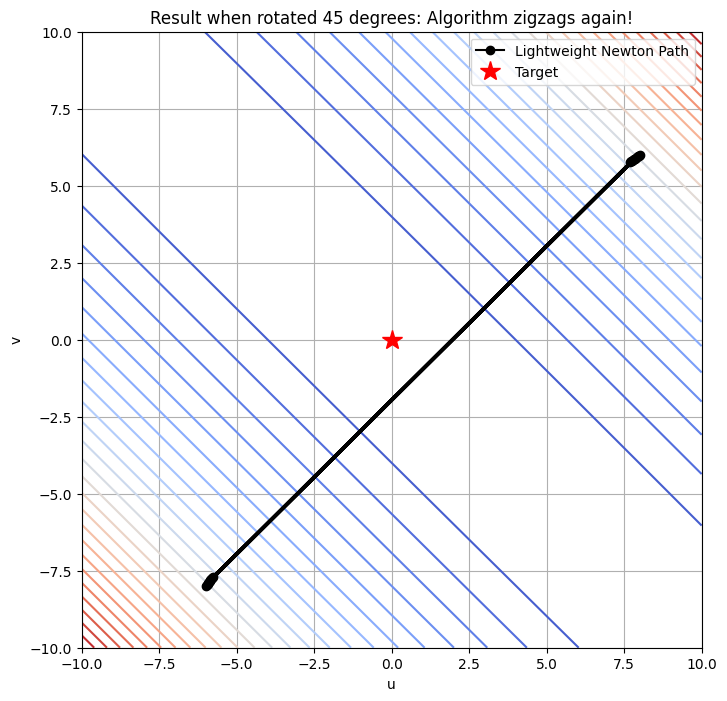

Position after 20 steps: [7.68631541 5.76473656]


In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# 1. Define the 45-degree rotated function
# f(u, v) = 500.5u^2 + 999uv + 500.5v^2
def f_rot(x):
    u, v = x[0], x[1]
    return 500.5 * u**2 + 999 * u * v + 500.5 * v**2

# Gradient of the rotated function
def grad_rot(x):
    u, v = x[0], x[1]
    du = 1001 * u + 999 * v
    dv = 999 * u + 1001 * v
    return np.array([du, dv])

# Diagonal Hessian (Ignore the off-diagonal element 999)
def hessian_diag_rot(x):
    # Second derivative with respect to u is 1001
    # Second derivative with respect to v is 1001
    return np.array([1001.0, 1001.0])

# 2. Lightweight Newton Algorithm (Copied from exercise 4)
def lightweight_newton_rot(start_x, lr=1.0, steps=20):
    path = [start_x]
    x = start_x.copy()

    for _ in range(steps):
        g = grad_rot(x)
        h = hessian_diag_rot(x)

        # Preconditioner using only diagonal elements
        preconditioner = 1.0 / (np.abs(h) + 1e-8)

        # Update
        x = x - lr * (preconditioner * g)
        path.append(x)

    return np.array(path)

# 3. Run experiment
# Corresponding rotated starting point
start_x = np.array([8.0, 6.0])

# Run algorithm
path = lightweight_newton_rot(start_x, lr=1.0, steps=20)

# 4. Plot figure
plt.figure(figsize=(8, 8))

# Create grid for drawing tilted contour
u = np.linspace(-10, 10, 100)
v = np.linspace(-10, 10, 100)
U, V = np.meshgrid(u, v)
Z = 500.5 * U**2 + 999 * U * V + 500.5 * V**2

plt.contour(U, V, Z, levels=30, cmap='coolwarm')
plt.plot(path[:, 0], path[:, 1], 'ko-', label='Lightweight Newton Path')
plt.plot(0, 0, 'r*', markersize=15, label='Target')

plt.title('Result when rotated 45 degrees: Algorithm zigzags again!')
plt.xlabel('u')
plt.ylabel('v')
plt.legend()
plt.grid(True)
plt.show()

print("Position after 20 steps:", path[-1])

# 3 Stochastic Gradient Descent

## 3.1 Vấn đề của Gradient Descent

Trong học sâu, hàm mục tiêu thường là trung bình của hàm mất mát trên từng mẫu trong tập dữ liệu huấn luyện.

Gọi $f_i(x)$ là hàm mất mát với mẫu thứ i trong tập dữ liệu gồm n mẫu, với x là vector tham số. Ta sẽ có hàm mục tiêu:

$$f(x) = \frac{1}{n} \sum_{i=1}^n f_i(x)$$

Ta tính gradient của biểu thức trên
$$\nabla f(x) = \frac{1}{n} \sum_{i=1}^n \nabla f_i(x)$$

Khi sử dụng Gradient Descent, ta có thể thấy với n mẫu chi phí tính toán cho mỗi lần lặp là O(n), tuyến tính với số mẫu, dẫn đến hạn chế lớn trên tập dữ liệu lớn.

Điều này dẫn đến sự ra đời của Stochastic Gradient Descent

## 3.2 Stochastic Gradient Descent là gì

Stochastic Gradient Descent (SGD) là một biến thể của Gradient Descent, được ra đời để giải quyết vấn đề chi phí tính toán của Gradient Descent.\
Thay vì tính toán trên toàn tập dữ liệu như Gradient Descent, SGD, ở mỗi lần lặp, lấy 1 mẫu i ngẫu nhiên theo phân phối đồng đều, và tính gradient để cập nhập w: $$
    x_{t+1} \leftarrow x - \eta \nabla f_i(x)$$
Lúc này, chi phí tính toán sẽ giảm từ O(n) xuống còn O(1). Vì ta chỉ cần cập nhập w theo gradient của một mẫu thay vì cập nhập toàn bộ mẫu như gradient descent.

**Stochastic Gradient là ước lượng tốt của Gradient**

Vì ta lấy ngẫu nhiên mẫu i theo phân phối đồng đều trên tập dữ liệu n mẫu nên i sẽ là một biến ngẫu nhiên.\
Vì stochastic gradient $\nabla f_i(x)$ phụ thuộc vào i và i ngẫu nhiên nên $\nabla f_i(x)$ là một biến ngẫu nhiên.\
Một biến ngẫu nhiên $\nabla f_i(x)$ được gọi là ước lượng tốt của gradient đầy đủ $\nabla f(x)$ nếu kỳ vọng của nó bằng gradient đầy đủ, tức là:
$$ \mathbb{E}_i [\nabla f_i(x)] = \sum_{i=1}^n \nabla f_i(x)p(i) = \frac{1}{n}\sum_{i=1}^n \nabla f_i(x)$$

Trong đó:
- $p(i) = \frac{1}{n}, i=1,2,...,n$ là xác suất chọn ngẫu nhiên mẫu thứ $i$ trong tập dữ liệu gồm $n$ mẫu.

Thay vào công thức gradient , ta được: $$\begin{equation}
    \mathbb{E}_i [\nabla f_i(x)] =\nabla f(x)
\end{equation}$$

Từ đó, ta có thể kết luận rằng stochastic gradient $\nabla f_i(x)$ là một unbiased estimator của gradient đầy đủ $\nabla f(x)$

Nói cách khác, mặc dù giá trị của $\nabla f_i(x)$ thay đổi tùy theo mẫu $i$ được chọn, nhưng nhìn trung bình, nó vẫn phản ánh chính xác hướng của gradient đầy đủ.\
Điều này giải thích tại sao việc sử dụng stochastic gradient trong thuật toán SGD vẫn dẫn đến hội tụ về cực tiểu của hàm mất mát.

## 3.3 Hạn chế của SGD

Với GD, thuật toán tính toán hướng dốc nhất dựa trên toàn bộ dữ liệu. Điều này dẫn đến việc hạ gradient một cách trơn tru, như lăn một viên bi xuống đồi.
Tuy nhiên với SGD, thuật toán tính toán chỉ dựa trên một mẫu tại mỗi bước. Gradient của một mẫu sẽ hầu như luôn có độ chênh lệch so với trung bình gradient trên toàn bộ dữ liệu. Điều này dẫn đến việc sinh nhiễu:
    $$\nabla f(x) = \nabla f_i(x) + \epsilon$$
Trong đó $\epsilon$ là nhiễu.\
Ngoài ra, để $\mathbb{E}_i[\nabla f_i(x) + \epsilon] = \nabla f(x)$ thì $\mathbb{E}_i[\epsilon] = \mathbb{E}_i[\nabla f_i(x)] - \nabla f(x) = 0$.

<figure id="fig:sgd" data-latex-placement="!ht">
<div class="center">
    <img src="https://github.com/devthienphu/CST_Team_2_Report/blob/main/Images//sgd/sgd.png?raw=1" />
</div>
</figure>

### 3.3.1 Tốc độ học động

Để khắc phục hạn chế từ mục trên, ta phải thay đổi $- \eta \nabla f_i(x)$. Điều này dẫn tới việc ta phải thay đổi $\eta$. Tuy nhiên, nếu ta để $\eta$ quá nhỏ thì sẽ không học được nhiều lúc ban đầu, nếu ta để $\eta$ quá lớn thì trường hợp Hình ([9](#fig:sgd){reference-type="ref" reference="fig:sgd"}) sẽ xảy ra. Để có thể khắc phục 2 tình huống dường như tương phản này, ta phải thay đổi tốc độ học nhỏ dần theo tiến trình tối ưu, gọi là lịch.

- Piecewise Constant: $$\begin{equation}
          \eta(t) = n_i, if \;t_i \leq t \leq t_{i+1}
  \end{equation}$$ Với chiến thuật này, ta giảm tốc độ học mỗi khi tiến trình tối ưu dừng.

- Exponential decay: $$\begin{equation}
          \eta(t) = \eta_0 . e^{-\lambda t}
  \end{equation}$$

  <figure id="fig:ed" data-latex-placement="!ht">
  <img src="https://github.com/devthienphu/CST_Team_2_Report/blob/main/Images//sgd/exp_decay.jpg?raw=1" style="width:50.0%" />
  <figcaption>Biểu đồ tốc độ học của exponential decay</figcaption>
  </figure>

  Vì tính chất của exponential decay là giảm mạnh như ([10](#fig:ed){reference-type="ref" reference="fig:ed"}) nên có thể dẫn
  tới trường hợp ngưng trệ sớm trước khi đạt tối ưu.

- Polynomial decay: $$\begin{equation}
          \eta(t) =\eta_0 . (\beta t + 1) ^{-\alpha}
  \end{equation}$$

  <figure id="fig:pd" data-latex-placement="!ht">
  <img src="https://github.com/devthienphu/CST_Team_2_Report/blob/main/Images//sgd/polynomial.jpg?raw=1" style="width:50.0%" />
  <figcaption>Biểu đồ tốc độ học của polynomial decay</figcaption>
  </figure>

## 3.4 Lấy mẫu trong môi trường hữu hạn

Trên lý thuyết, ta xem SGD lấy 1 mẫu để tính toán trên 1 vòng lặp ngẫu nhiên với thay thế từ một phân phối nền. Tuy nhiên trên thực tế, ta thường chỉ có một tập dữ liệu hữu hạn và quá trình huấn luyện thường được duyệt qua toàn bộ tập này một cách ngẫu nhiên với mỗi mẫu được chọn đúng một lần, không thay thế.

### 3.4.1 Lấy mẫu hoàn lại và lấy mẫu không hoàn lại

Để minh họa tại sao trên thực tế ta dùng lấy mẫu không hoàn lại, ta phải giải thích tại sao lại không dùng mẫu hoàn lại.\
Ta xét tập dữ liệu có n mẫu từ 1 phân phối rời rạc với thay thế. Với xác suất chọn phần tử i ngẫu nhiên là $\frac{1}{n}$, để có thể chọn i ít nhất 1 lần: $$\begin{equation}
    P(choose\;i) = 1 - {P(omit\;i)} = 1 - \prod_{i=1}^n[1-P(choose\;i\;once)] = 1 - [1 - \frac{1}{n}]^n
\end{equation}$$

Lại có: $$\begin{equation}
    \lim_{n\rightarrow + \infty}(1 + \frac{x}{n})^n = e^x
\end{equation}$$
Khi ta có n tiến về vô cùng, từ (5) và (6) ta được: $$\begin{equation}
    P(choose\;i) = (1 + \frac{(-1)}{n})^n \approx 1 - e^{-1} \approx 0.63
\end{equation}$$

Ngoài ra, để có thể chọn i đúng 1 lần:
$$\begin{equation}
\begin{split}
     P(choose\;i\;exactly\;once) &= \binom{n}{1}P(choose\;i\;once)P(omit\;i\;n-1)
        = \frac{n!}{1!(n-1)!} \frac{1}{n} (1 - \frac{1}{n})^{n-1} \\
        &= \frac{(1-\frac{1}{n})^n}{1-\frac{1}{n}} = \frac{n}{n-1}(1- \frac{1}{n})^n\approx e^{-1}
        \\&\approx 0.37
\end{split}
\end{equation}$$

Từ 2 phương trình (7) và (8) ta có thể suy ra rằng khi số lần lấy mẫu tiến về vô cùng, mỗi phần tử trong tập dữ liệu chỉ có xác suất xấp xỉ 63% được chọn ít nhất 1 lần và chỉ khoảng 37% xác suất được chọn đúng một lần trong một lần lặp. Điều này cho thấy việc lấy mẫu với hoàn lại làm tăng độ biến thiên thông qua một số mẫu bị lặp đi lặp lại nhiều lần làm độ biến thiên cao và một số mẫu không bao giờ được sử dụng làm độ hiểu quả dữ liệu thấp.

## 3.5 Ví dụ tính toán

### 3.5.1 Ví dụ đơn giản

**Đặt vấn đề**
Trong ví dụ này, ta xét bài toán hồi quy tuyến tính đơn giản: $$y = wx,$$ trong đó, x là biến đầu vào, y là giá trị mục tiêu và w là tham số cần học. Vì dữ liệu hoàn toàn tuyến tính, ta biết được tham số tối ưu w\* = 2. Ta sử dụng tập dữ liệu gồm 5 điểm (x, y):
$$\{(1,2),(2,4),(3,6),(4,8),(5,10)\}$$
Để đo lường sai số giữa dự đoán và nhãn thật, ta sử dụng hàm mất mát **Sai số toàn phương trung bình**:
$$L(w) = \frac{1}{2n} \sum_{i=1}^n(y_i - \hat{y_i})^2 = \frac{1}{2n} \sum_{i=1}^n(y_i - wx_i)^2$$
Ngoài ra, với các siêu tham số như tốc độ học ($\eta$) và w ban đầu, ta sẽ mặc định là: $$\eta = 0.1,\;w_0 = 0.0$$ -3.25ex 1.5ex \*Giải tay Đạo hàm hàm mất mát theo w ta được,

$$\frac{\partial{L}}{\partial{w}} = -\frac{1}{n} \sum_{i=1}^nx_i(y_i - wx_i)$$

Trong môi trường SGD, ta chọn một mẫu ngẫu nhiên để tính xấp xỉ gradient toàn phần:
$$\frac{\partial{L}}{\partial{w}} \approx -x_i(y_i - wx_i) = g(i)$$
Ta sẽ giải quyết bài toán theo phương pháp chọn mẫu không thay thế:

- Bước 1:

  - Ta rút 1 phần tử trong tập dữ liệu (x,y) được (1,2).

  - Tính $g(1) = -x_1(y_1 - w_ox_1) = -2$.

  - Cập nhập $w_1 = w_0 - \eta g(1) = 0.2$.

- Bước 2:

  - Ta rút 1 phần tử trong tập dữ liệu (x,y) được (3,6).

  - Tính $g(3) = -x_3(y_3 - w_1x_3) = -16.2$

  - Cập nhập $w_2 = w_1 - \eta g(3) = 1.82$.

- Bước 3:

  - Ta rút 1 phần tử trong tập dữ liệu (x,y) được (4,8).

  - Tính $g(4) = -x_4(y_4 - w_2x_4) = -2.88$

  - Cập nhập $w_3 = w_2 - \eta g(4) = 2.108$.

- Bước 4:

  - Ta rút 1 phần tử trong tập dữ liệu (x,y) được (2,4).

  - Tính $g(2) = -x_2(y_2 - w_3x_2) = 0.432$

  - Cập nhập $w_4 = w_3 - \eta g(2) = 2.0648$.

- Bước 5:

  - Ta rút 1 phần tử trong tập dữ liệu (x,y) được (5,10).

  - Tính $g(5) = -x_5(y_5 - w_4x_5) = 1.62$

  - Cập nhập $w_5 = w_4 - \eta g(5) = 1.9028$.

Kết quả sau một epoch (một lượt đi qua toàn bộ dữ liệu, không thay thế, theo thứ tự trên) là: $$w_{final}=1.9028$$ Qua các bước, ta có thể quan sát rõ đặc tính nhiễu của SGD. Giá trị w không di chuyển một cách trơn tru về giá trị tối ưu là w\* = 2 như GD. Thay vào đó, nó dao động xung quanh w\*. Để khắc phục điều này, ta sử dụng lịch cập nhập tốc độ học để giảm sự dao động.

<figure data-latex-placement="!ht">
<img src="https://github.com/devthienphu/CST_Team_2_Report/blob/main/Images//sgd/ex_sgd_1.png?raw=1" style="width:75.0%" />
</figure>

### 3.5.2 Ví dụ thay đổi tốc độ học động

**Đặt vấn đề**
Giữ nguyên vấn đề ở Mục tuy nhiên đối với tốc độ học, ta cập nhập theo lịch Polynomial decay với $\beta = 1$ và $\alpha = 0.5$: $$\eta(t) = \eta_0(\beta t + 1)^{-\alpha} = \frac{\eta_0}{(t+1)^{-0.5}}$$

**Giải tay**
- Bước 1:

  - Ta rút 1 phần tử trong tập dữ liệu (x,y) được (1,2).

  - Tính $g(1) = -x_1(y_1 - w_0x_1) = -2$.

  - Tính $\eta_1 = \frac{0.1}{1^{0.5}} = 0.1$.

  - Cập nhập $w_1 = w_0 - \eta_1 g(1) = 0.2$.

- Bước 2:

  - Ta rút 1 phần tử trong tập dữ liệu (x,y) được (3,6).

  - Tính $g(3) = -x_3(y_3 - w_1x_3) = -16.2$.

  - Tính $\eta_2 = \frac{0.1}{2^{0.5}} \approx 0.0707$.

  - Cập nhập $w_2 = w_1 - \eta_2 g(3) \approx 1.345$.

- Bước 3:

  - Ta rút 1 phần tử trong tập dữ liệu (x,y) được (4,8).

  - Tính $g(4) = -x_4(y_4 - w_2x_4) = -10.48$.

  - Tính $\eta_3 = \frac{0.1}{3^{0.5}} \approx 0.0577$.

  - Cập nhập $w_3 = w_2 - \eta_3 g(4) \approx 1.951$.

- Bước 4:

  - Ta rút 1 phần tử trong tập dữ liệu (x,y) được (2,4).

  - Tính $g(2) = -x_2(y_2 - w_3x_2) = -0.196$.

  - Tính $\eta_4 = \frac{0.1}{4^{0.5}} = 0.05$.

  - Cập nhập $w_4 = w_3 - \eta_4 g(2) \approx 1.9618$.

- Bước 5:

  - Ta rút 1 phần tử trong tập dữ liệu (x,y) được (5,10).

  - Tính $g(5) = -x_5(y_5 - w_4x_5) = -0.955$.

  - Tính $\eta_5 = \frac{0.1}{5^{0.5}} \approx 0.0447$.

  - Cập nhập $w_5 = w_4 - \eta_5 g(5) \approx 1.9846$.

<figure data-latex-placement="!ht">
<img src="https://github.com/devthienphu/CST_Team_2_Report/blob/main/Images//sgd/ex2_sgd.png?raw=1" style="width:75.0%" />
</figure>

## Giải bài tập

### Bài 1

<figure id="fig:diff_lr" data-latex-placement="!ht">
<img src="https://github.com/devthienphu/CST_Team_2_Report/blob/main/Images//sgd/diff_lr.png?raw=1" style="width:75.0%" />
</figure>

Đồ thị cho thấy:

- Đối với tốc độ học hằng: Tốc độ cao ($\eta=0.1$) hội tụ nhanh nhưng dao động mạnh quanh nghiệm do bước nhảy lớn. Tốc độ thấp ($\eta=0.01$) ổn định hơn nhưng hội tụ rất chậm.

- Chiến lược Polynomial Decay đạt hiệu quả tốt nhất, cân bằng được tốc độ ban đầu và giảm thiểu dao động về sau, đạt mức sai số thấp nhất ($\sim 10^{-2}$).

- Chiến lược Exponential Decay có dấu hiệu giảm bước nhảy quá nhanh, khiến mô hình bị chững lại trước khi đạt tối ưu sâu nhất.

### Bài 2

Ta có:
$$f(w_1,w_2) = w_1^2 + 2w_2^2$$

Lấy gradient:
$$\begin{equation}
    \nabla f(\mathbf{w}) =
    \begin{bmatrix}
        \frac{\partial f}{\partial w_1} \\
        \frac{\partial f}{\partial w_2}
    \end{bmatrix} =
\begin{bmatrix}
2w_1 \\
4w_2
\end{bmatrix}
\end{equation}$$

Sau đó, ta thêm nhiễu chuẩn vào phương trình (9)
$$f(w_1,w_2) = w_1^2 + 2w_2^2$$

Lấy đạo hàm:

$$\nabla f({w}) + \epsilon_{nor} =  \begin{bmatrix}  2w_1 \\  4w_2  \end{bmatrix} + \begin{bmatrix} \epsilon_1\\ \epsilon_2 \end{bmatrix}$$

Ngoài ra, ta có phương trình:
$$L(\mathbf{x}, \mathbf{w}) = (x_1 - w_1)^2 + 2(x_2 - w_2)^2$$

Lấy gradient: $$\nabla_w L(x,w) =  \begin{bmatrix}  \frac{\partial L}{\partial w_1} \\  \frac{\partial L}{\partial w_2}  \end{bmatrix}  =  \begin{bmatrix}  2(x_1 - w_1)(-1) \\  4(x_2-w_2)(-1)\ \end{bmatrix} = \begin{bmatrix}  2w_1\\  4w_2\ \end{bmatrix} + \begin{bmatrix} -2x_1\\ -4x_2 \end{bmatrix}$$

Vì $x_1$ và $x_2$ là phân phối chuẩn nên $\begin{bmatrix} -2x_1\\-4x_2 \end{bmatrix}$ cũng là phân phối chuẩn mà lại có $\epsilon$ là từ phân phối chuẩn nên hai nguồn nhiễu này là tương đương nhau về mặt phân phối.

Từ đó ta có thể đưa ra kết luận rằng:
$$\begin{equation}
    \nabla f({w}) + \epsilon_{nor} \equiv \nabla_w L(x,w)
\end{equation}$$

### Bài 3

Nguyên nhân là do trong phương pháp lấy mẫu có hoàn lại, về mặt xác suất có xấp xỉ 37% ($e^{-1}$) (8) dữ liệu bị bỏ sót trong mỗi epoch. Việc này tạo ra nhiễu lớn do sự trùng lặp và thiếu hụt thông tin. Ngược lại, phương pháp lấy mẫu không hoàn lại đảm bảo 100% dữ liệu được sử dụng chính xác một lần trong mỗi epoch, giúp giảm phương sai và điều hướng gradient chính xác hơn về điểm tối ưu.

### Bài 4

Khi một số chiều cho gradient lớn hơn các gradient còn lại, ta sẽ gặp vấn đề về tốc độ học. Nếu tốc độ học nhỏ thì các gradient nhỏ sẽ không thay đổi nhiều, nếu tốc độ học lớn thì các gradient lớn thường xuyên sẽ thay đổi một cách vượt mức. Để khắc phục điều này, ta có thể thay đổi tốc độ học theo từng chiều. Thay vì để tốc độ học $\eta$ cố định, ta có thể để tốc độ học là: $$\eta \over \sqrt{\sum g^2}$$

Trong đó g là các gradient từ quá khứ đến hiện tại. Khi đó với các chiều có gradient lớn thì mẫu số sẽ lớn lên dẫn tới bước nhảy nhỏ lại, và các chiều có gradient nhỏ thì sẽ ngược lại.

### Bài 5

Ta có $$f(x) = x^2(1 + sinx)$$ Ta thấy:

- $x^2 \ge 0$

- $1+sinx \ge 0$, vì $sinx \ge -1$

Do đó, $f(x) \ge 0$. Giá trị nhỏ nhất tuyệt đối của $f(x) = 0$. Hàm số đạt giá trị = 0 khi:

- $x=0$

- $1+sinx = 0 \iff sinx = -1 \iff x = \frac{3\pi}{2} + 2k\pi, k \in \mathbb{Z}$

Tại các điểm này, $f'(x) = 0$, do đó tất cả chúng đều là cực tiểu địa phương, và cũng là cực tiểu toàn cục. Vì tập số nguyên là vô hạn nên số điểm cực tiểu cũng là vô hạn.
Vậy số điểm cực tiểu của hàm $f(x) = x^2(1 + sinx)$ là vô hạn.

<figure id="fig:e5" data-latex-placement="!ht">
<img src="https://github.com/devthienphu/CST_Team_2_Report/blob/main/Images//sgd/excercise_5.png?raw=1" style="width:75.0%" />
<figcaption>Biểu đồ <span
class="math inline"><em>f</em>(<em>x</em>) = <em>x</em><sup>2</sup>(1 + <em>s</em><em>i</em><em>n</em><em>x</em>)</span></figcaption>
</figure>

Ta có thể thấy tất cả điểm đều nằm ở cực tiểu toàn cục nên ta không phải xét từng điểm cực tiểu địa phương. Để có thể tạo các điểm cực tiểu khác địa phương khác nhau, ta thêm nhiễu vào công thức ban đầu:
$$f(x) = x^2(1 + 0.9\sin (x\sqrt{2})) + \epsilon$$

Tuy nhiên, để nhiễu này có thể thích ứng với vô hạn cực tiểu địa phương thì ta nhiễu phải có dạng $$\epsilon = \alpha \sin (\beta x)$$

- Với tần số $\beta$: Ta phải chọn $\beta$ sao cho tỉ số giữa nó và tần số của hàm gốc là một số **vô tỷ**. Ở đây ta chọn $\beta = \sqrt{2}$ vì $\sqrt{2}$ là số vô tỷ, đảm bảo rằng chu kỳ của nhiễu và chu kỳ của hàm chính không bao giờ đồng bộ, từ đó tạo ra các cực tiểu địa phương có độ sâu thay đổi.

- Với tần số $\alpha$: Ta chỉ cần chọn $\alpha \neq 0$. $\alpha$ càng lớn thì độ chênh giữa các sóng càng lớn.

<figure id="fig:ex5_2" data-latex-placement="!ht">
<img src="https://github.com/devthienphu/CST_Team_2_Report/blob/main/Images//sgd/ex5_2.png?raw=1" style="width:75.0%" />
</figure>

# 4 Mini-Batch Stochastic Gradient Descent

Trong các phần trước ta có:

- Gradient Descent (GD): Sử dụng toàn bộ n mẫu dữ liệu, vì vậy chi phí tính toán gradient cho mỗi bước cập nhật là quá lớn, không khả thi với các tập dữ liệu khổng lồ.

- Stochastic Gradient Descent (SGD): Chỉ sử dụng 1 mẫu dữ liệu, chi phí thấp, nhưng gradient ước tính quá hỗn loạn (*high variance*), dẫn đến đường đi tối ưu hóa có hình zigzag và không ổn định.

Do đó, Mini Batch Gradient Descent (MGD) ra đời để giải quyết vấn đề này bằng cách sử dụng một nhóm nhỏ dữ liệu (Batch-size) để ước tính gradient, tạo ra sự cân bằng tối ưu giữa hiệu suất và độ ổn định.

## 4.1 Các yếu tố ảnh hưởng đến tối ưu hóa

Trong quá trình huấn luyện mô hình học sâu, hiệu quả tính toán đóng vai trò quyết định tới tốc độ và chất lượng hội tụ. Mặc dù GD và SGD là hai phương pháp cơ bản để cập nhật tham số, tối ưu hóa nhưng đều gặp hạn chế lớn khi triển khai trên phần cứng hiện đại. Trong bối cảnh đó, MGD trở thành lựa chọn tối ưu trong đa số hệ thống học sâu, phù hợp với hai yếu tố cốt lõi của kiến trúc hệ thống máy tính hiện đại vector hóa và bộ nhớ đệm.

### 4.1.1 Vec-tơ hóa (Vectorization)
Trong ngữ cảnh tối ưu mô hình học máy, vectorization là kỹ thuật chuyển các thao tác xử lý dữ liệu từ dạng từng mẫu
riêng lẻ sang dạng phép toán trên ma trận/tensor. Mục tiêu của vectorization
không phải là thay đổi thuật toán, mà là thay đổi cách triển khai để tận dụng
các thư viện tính toán cấp thấp được tối ưu hoá bằng C/CUDA (như BLAS,
cuBLAS) và phần cứng chuyên dụng như SIMD trên CPU hay hàng nghìn lõi
song song trên GPU.

Trước hết, các bộ xử lý hiện đại như GPU/CPU, được thiết kế để thực hiện một lượng lớn phép toán song song trong cùng một chu kỳ lệnh. Thay vì xử lý từng lệnh một, CPU/GPU có thể xử lý 8, 16, 32, 64... lệnh đồng thời. Điều này có nghĩa là kích thước mảng đầu vào càng lớn, khả năng tận dụng sức mạnh tính toán càng cao. Ngược lại, nếu xử lý từng mẫu đơn lẻ như SGD thì phần lớn năng lực của phần cứng bị lãng phí vì mỗi lệnh chỉ hoạt động trên một phần tử.

Các kiến trúc CPU và GPU hiện đại được thiết kế để thực hiện các phép toán trên vector và ma trận một cách song song. MGD cũng tương tự, bằng cách tính toán gradient cho nhiều mẫu cùng lúc, dẫn đến hiệu suất tính toán cao hơn nhiều so với việc tính toán tuần tự.

**Ví dụ minh hoạ:**
Xét mô hình dự đoán tuyến tính:

$$
\hat{y} = w^\top x
$$

với $x \in \mathbb{R}^d$ và $w \in \mathbb{R}^d$.

- *Nếu sử dụng SGD (batch size $=1$):* Input của mỗi bước chỉ là một mẫu $x_i$. Quá trình dự đoán: $\hat{y}_i = w^\top x_i$ đây chỉ là một phép nhân vô hướng duy nhất. Khi cần lặp điều này hàng nghìn lần trong một vòng `for` của Python, chi phí bị tăng đáng kể do Python quản lý từng vòng lặp và mỗi lần tính toán chỉ xử lý khối lượng quá nhỏ nên không thể tận dụng lợi thể của vectorization.

- *Nếu sử dụng Mini-Batch SGD (batch size $m$):* Gom dữ liệu thành một ma trận:

$$
X = \begin{bmatrix}
x_1^\top \\
\vdots \\
x_m^\top
\end{bmatrix} \in \mathbb{R}^{m\times d}
$$

dự đoán cho cả $m$ mẫu được thực hiện cùng lúc: $\hat{Y} = X w$, đây là một phép nhân ma trận/vector duy nhất và được hỗ trợ bởi các thư viện.
### 4.1.2 Bộ nhớ đệm

Yếu tố tiếp theo là bộ nhớ đệm (cache), CPU và GPU có nhiều tầng bộ nhớ khác nhau, gồm các bộ nhớ đệm L1, L2, L3 và sau cùng là RAM. Các tầng cache có dung lượng nhỏ nhưng tốc độ truy xuất cực nhanh, RAM thì có dung lượng lớn nhưng tốc độ chậm hơn. Một thuật toán có hiệu suất cao phải đảm bảo rằng dữ liệu được xử lý nằm trong bộ nhớ đệm. Nếu dữ liệu quá lớn, sẽ bị tràn và đẩy ra RAM, vì thế hiệu suất cũng sẽ sụt giảm mạnh, được gọi là hiện tượng \"cache miss\".

Việc xử lý các khối dữ liệu liền kề (mini-batch) giúp cải thiện tỷ lệ \"Cache hit\", tức dữ liệu cần thiết đã có sẵn trong bộ nhớ cache tốc độ cao L1/L2 của CPU hoặc VRAM của GPU. Giảm thiểu chi phí truy cập RAM vốn là yếu tố thắt cổ chai trong huấn luyện học sâu.

Mặc dù ba phương pháp GD, SGD và Mini-Batch SGD đều dựa trên việc tính
gradient của hàm mất mát nhưng chi phí của từng bước cập nhật lại khác nhau đáng
kể do cách sử dụng tài nguyên phần cứng.

*Gradient Descent (GD - full batch):* Tại mỗi bước cập nhật, gradient được tính trên toàn bộ $N$ mẫu:

\begin{equation}
    g_{\text{GD}}(\theta) = \frac{1}{N}
    \sum_{i=1}^{N}\nabla_{\theta}\ell\big(f(x_i;\theta), y_i\big).
\end{equation}

- Ưu điểm: Việc gom toàn bộ dữ liệu thành ma trận $X \in \mathbb{R}^{N\times d}$
cho phép vector hoá tốt, vì gradient có thể được tính bằng một phép nhân
ma trận lớn.

- Hạn chế:
  + Ma trận quá lớn gây vấn đề bộ nhớ trên GPU (VRAM thường nhỏ hơn RAM hệ thống);
  + Chi phí tính toán của một bước rất cao do xử lý toàn bộ dữ liệu cùng lúc; số lần cập nhật (updates/second) thấp, tốc độ hội tụ theo thời gian thực bị giảm.

*Stochastic Gradient Descent (SGD - batch size $=1$):* Tại mỗi bước chỉ xử lý một mẫu duy nhất:
\begin{equation}
    g_{\text{SGD}}(\theta)
    = \nabla_{\theta}\ell\big(f(x_i;\theta), y_i\big).
\end{equation}

- Hạn chế:
  + Gần như không thể vector hoá, vì mỗi lần chỉ có một số lượng nhỏ phần tử được xử lý;
  + Việc lặp nhiều vòng `for` trong Python hoặc gọi kernel hàng nghìn lần làm overhead hàm và truy cập bộ nhớ chiếm tỷ trọng lớn hơn số phép toán thực sự. Do đó, dù mỗi bước rẻ, tốc độ xử lý theo thời gian thực không tốt, đặc biệt trên GPU.

*Mini-Batch SGD (batch size $=m$):* Tại mỗi bước dùng một nhóm mẫu kích thước $m$:
\begin{equation}
    g_{\text{MB}}(\theta)
    = \frac{1}{m}\sum_{i\in B}
      \nabla_{\theta}\ell\big(f(x_i;\theta), y_i\big).
\end{equation}

- Ưu điểm:
  + Ma trận mini-batch $X_B \in \mathbb{R}^{m\times d}$ đủ lớn để tận dụng vectorization nhưng không quá lớn để gây quá tải bộ nhớ;
  + Giảm đáng kể số lần gọi kernel/hàm BLAS, và mỗi lần gọi lại xử lý nhiều mẫu $\Rightarrow$ tăng throughput tính toán;
  + Trong thực tế, hiệu suất đạt mức tối ưu trong một khoảng batch-size (thường từ 32 đến 1024, tuỳ mô hình và phần cứng).

Tóm lại, khi triển khai các thuật toán tối ưu hóa, một yêu cầu quan
trọng là hiệu suất tính toán và tốc độ, vì vậy cách tốt nhất là làm việc với mini-batch, nhằm giảm thiểu thời gian chạy mỗi bước cập nhật tham số, bởi vì việc tính toán gradient và cập nhật mô hình sẽ được lặp đi lặp lại hàng ngàn lần, hàng triệu lần trong quá trình huấn luyện.

Một trong những cách hiệu quả nhất để tăng tốc là vec-tơ hóa hay viết các phép tính theo dạng toán vector/matrix thay vì dùng vòng lặp code for, while,\.... Điều này rất quan trọng vì:
   + Các phép toán dạng vector/matrix được thực thi bằng các thư viện tối ưu hóa cao như BLAS, cuBLAS, MKL... vì vậy có tốc độ thực thi cực nhanh so với các vòng lặp code với các phép tính số học đã được biên dịch ở mức thấp.
   + Trên GPU, vec-tơ hóa là điều kiện bắt buộc để thực thi song song hóa.

  *Ví dụ:* Giả sử ta muốn tính dự đoán của mô hình tuyến tính: $y = wx$. Nếu ta dùng vòng lặp For/Python như:

        for i in range(n):
            y[i] = dot(X[i], w)

Khi $n$ rất lớn, việc tính toán sẽ rất chậm nhưng nếu ta dùng phép nhân ma trận/vector: $y = wx$, toàn bộ phép tính được vector hóa và được tối ưu bởi các thư viện tính toán hiệu năng cao.

## 4.2 Mini-batches

*Mini-batch* hay *lô nhỏ* là trung tâm của hầu hết các thuật toán tối ưu hóa hiện đại trong học sâu. Trong thực tế, ta mặc định rằng mình sẽ đọc các lô nhỏ dữ liệu thay vì từng quan sát đơn lẻ, hoặc toàn bộ dữ liệu để cập nhật các siêu tham số. Vì việc xử lý từng quan sát đơn lẻ đòi hỏi phải thực hiện nhiều phép nhân ma trận - vector hoặc vector - vector, điều này khá tốn kém và gây ra chi phí đáng kể cho framework học sâu và hiếm có phần cứng máy tính nào đáp ứng được việc quan sát các dữ kiệu \"siêu khổng lồ\". Điều này đúng cả trong các thuật toán tối ưu hóa của học sâu hiện đại, trong quá trình huấn luyện và suy luận.

### 4.2.1 Vậy tại sao phải dùng mini-batch?

Trước hết ta có công thức cập nhật tham số: $$\begin{equation*}
    \mathbf{w} \leftarrow \mathbf{w} - \eta \, g_t,
\end{equation*}$$

Trong đó $g_t$ là gradient được tính từ một quan sát đơn lẻ hay SDG $(\mathbf{x}_t, \mathbf{w})$ được tính bằng công thức:
$$\begin{equation*}
    g_t = \partial_{\mathbf{w}} f(\mathbf{x}_t, \mathbf{w})
\end{equation*}$$

Tuy nhiên, có thể tăng hiệu quả, tốc độ tính toán không? Câu trả là có, bằng cách áp dụng cập nhật tham số trên một lô nhỏ các quan sát tại một thời điểm. Nghĩa là, ta thay thế gradient $g_t$ trên một quan sát đơn lẻ bằng gradient trên một mini-batch và được tính bằng công thức:

$$\mathbf{g}_t = \partial_{\mathbf{w}} \left( \frac{1}{|B_t|} \sum_{i \in B_t} f(\mathbf{x}_i, \mathbf{w}) \right)$$

trong đó $\mathcal{B}_t$ là tập chỉ số của mini-batch thứ $t$ và $|\mathcal{B}_t| = b$ là kích thước mini-batch.

### 4.2.2 Mini-batch làm giảm nhiễu của hệ thống như thế nào

Giả sử tất cả các phần tử trong mini-batch $\mathcal{B}_t$ đều được rút ra độc lập và phân phối giống nhau từ tập huấn luyện.

- Gọi $\Sigma = \text{Var}(\mathbf{g}_i)$ là phương sai của một gradient mẫu đơn lẻ, thì phương sai của mini-batch gradient $\mathbf{g}_t$ là:$$\text{Var}(\mathbf{g}_t) = \text{Var}\left( \frac{1}{b} \sum_{i=1}^{b} {g}_i \right)$$

- Đưa hằng số $\frac{1}{b}$ ra ngoài dấu phương sai. Theo quy tắc thống kê, đưa hằng số ra ngoài Var thì phải bình phương lên ($\frac{1}{b} \to \frac{1}{b^2}$):

$$\text{Var}(\mathbf{g}_i)= \frac{1}{b^2} \text{Var}\left( \sum g_i \right)$$

- Vì các mẫu độc lập, phương sai của một tổng bằng tổng các phương sai $\text{Var}(A+B) = \text{Var}(A) + \text{Var}(B)$:
$$\text{Var}(\mathbf{g}_i)= \frac{1}{b^2} \sum \text{Var}(g_i)$$


- Tổng của $b$ cái phương sai giống nhau ($\Sigma$) chính là $b \cdot \Sigma$:$$\text{Var}(\mathbf{g}_i)= \frac{1}{b^2} \cdot (b \cdot \Sigma) = \frac{\Sigma}{b}$$

Vậy phương sai giảm theo $\frac{1}{b}$, phương sai giảm nhanh chóng khi $b$ tăng.

Độ lệch chuẩn (Standard Deviation - SD): Là căn bậc hai của phương sai. Vì phương sai giảm $b$ lần, nên độ lệch chuẩn giảm $\sqrt{b}$ lần.$$\text{SD}(g_t) = \frac{\sqrt{\Sigma}}{\sqrt{b}}$$

*Ví dụ minh họa:* Nếu SGD là một người say rượu đi bộ, lảo đảo rất mạnh (phương sai lớn), thì Mini-batch giống như một nhóm người nắm tay nhau cùng đi. Mặc dù từng cá nhân có thể lảo đảo, nhưng trọng tâm của cả nhóm sẽ di chuyển theo một đường thẳng và mượt mà hơn rất nhiều (phương sai nhỏ).

### 4.2.3 Vậy chọn Batch-size càng lớn càng tốt?

Thoạt nhìn, có thể nghĩ rằng việc chọn batch-size lớn luôn luôn tốt, vì nó làm giảm phương sai, độ lệch chuẩn của gradient.

Tuy nhiên, về vấn đề về Hiệu suất:
- Lợi ích: Tăng theo hàm căn bậc hai ($\sqrt{b}$).
- Chi phí: Tăng theo hàm tuyến tính ($b$).

*Ví dụ:* Giả sử đang dùng batch size = 100. Nếu muốn hướng đi chính xác hơn gấp đôi (giảm độ lệch chuẩn đi 2 lần).
+ Theo công thức $1/\sqrt{b}$, để giảm 2 lần ($\sqrt{b} = 2$), cần tăng $b$ lên $2^2 = 4$ lần. Tức là phải tăng batch size lên 400. Hậu quả: Máy tính phải tính toán khối lượng công việc gấp 4 lần, nhưng hiệu quả ổn định chỉ tăng được gấp đôi, không tương xứng
+ Thêm vào đó là giới hạn phần cứng: Nếu batch size quá lớn, VRAM của GPU  sẽ bị tràn khiến chương trình bị crash/cache miss.

Trong thực tế, ta thường chọn một Batch-size đủ lớn để mang lại hiệu quả tính toán tốt, tận dụng GPU/CPU nhưng vẫn chứa đủ trong bộ nhớ đệm/VRAM của GPU.

### 4.2.4 Benchmark vectorization và Mini-Batch trên CPU/GPU

Để kiểm chứng các phân tích ở trên, ta tiến hành benchmark trên Google Colab
(với CPU và GPU Tesla T4). Hai thí nghiệm được thực hiện:
  + So sánh tốc độ thực thi giữa *for-loop* và *vectorization* trong phép nhân $Xw$.
  + So sánh tốc độ của *GD, SGD và Mini-Batch SGD*, với cùng hàm mất mát và learning rate.


**Thí nghiệm 1:** For-loop vs Vectorization

In [ ]:
import torch
import time

# Khởi tạo kích thước ma trận
n, d = 200_000, 512

# Kiểm tra xem có GPU (CUDA) không, nếu không thì dùng CPU
device = "cuda" if torch.cuda.is_available() else "cpu"
print(f"Đang chạy trên: {device}")

# Tạo dữ liệu ngẫu nhiên
X = torch.randn(n, d, device=device)
w = torch.randn(d, 1, device=device)

# Hàm tính toán kiểu vòng lặp (Chậm)
def loop_style():
    y = torch.zeros(n, 1, device=device)
    for i in range(n):
        y[i] = X[i] @ w
    return y

# Hàm tính toán kiểu Vector hóa (Nhanh)
def vec_style():
    return X @ w

# --- Đo thời gian vòng lặp ---
print("Đang chạy vòng lặp (vui lòng đợi)...")
start = time.time()
loop_style()
if device == "cuda": torch.cuda.synchronize() # Đồng bộ hóa nếu dùng GPU
t_loop = time.time() - start

# --- Đo thời gian Vector hóa ---
print("Đang chạy Vector hóa...")
start = time.time()
vec_style()
if device == "cuda": torch.cuda.synchronize()
t_vec = time.time() - start

# Kết quả
print(f"Thời gian Loop: {t_loop:.4f}s")
print(f"Thời gian Vec:  {t_vec:.4f}s")
print("Speedup =", t_loop / t_vec, "lần")

### Kết quả
**Bảng:** Benchmark For-loop vs Vectorization trên CPU (Google-colab)

| Thiết lập | For-loop (s) | Vectorized (s) | Speedup |
| :--- | :---: | :---: | :---: |
| **CPU** | 3.4728 | 0.0394 | $88.2\times$ |

Vectorization giúp giảm thời gian tính toán từ $3.47\,$s xuống $0.039\,$s, tức nhanh hơn $88.2$ lần.

**Thí nghiệm 2:** So sánh GD, SGD và Mini-Batch trên bài toán tuyến tính lớn

Trong thí nghiệm này, ta xét bài toán tối ưu hàm mất mát bậc hai đơn giản:

$$
f(w) = \frac{1}{2}\|Xw - y\|_2^2
$$

với ma trận dữ liệu lớn $X \in \mathbb{R}^{N\times d}$.

Mục tiêu là so sánh thời gian cho một epoch và bộ nhớ cần dùng khi áp dụng:
* **GD** (Gradient Descent - Toàn bộ dữ liệu)
* **SGD** (Stochastic Gradient Descent - Từng mẫu)
* **Mini-Batch SGD** (Từng lô nhỏ)

In [ ]:
# Benchmark GD vs SGD vs Mini-batch trên bài toán tuyến tính lớn
import torch, time

N, d = 100_000, 512          # dữ liệu khá lớn
device = "cuda" if torch.cuda.is_available() else "cpu"

X = torch.randn(N, d, device=device)
y = torch.randn(N, 1, device=device)

def loss_fn(X, w, y):
    return 0.5 * ((X @ w - y) ** 2).mean()

def run_epoch(method, batch_size=None):
    w = torch.randn(d, 1, device=device)
    lr = 0.1

    torch.cuda.reset_peak_memory_stats(device) if device=="cuda" else None
    start = time.time()

    if method == "GD":
        # full-batch: dùng toàn bộ X trong một lần cập nhật
        g = (X.T @ (X @ w - y)) / N
        w = w - lr * g

    elif method == "SGD":
        # batch size = 1: duyệt từng mẫu, khó vector hóa
        for i in range(N):
            xi = X[i:i+1, :]
            yi = y[i:i+1, :]
            g = xi.T @ (xi @ w - yi)
            w = w - lr * g

    elif method == "MB":
        # Mini-batch: batch_size mẫu mỗi lần, vừa vector hóa vừa giảm memory
        bs = batch_size
        for i in range(0, N, bs):
            Xi = X[i:i+bs, :]
            yi = y[i:i+bs, :]
            g = (Xi.T @ (Xi @ w - yi)) / bs
            w = w - lr * g

    if device == "cuda":
        torch.cuda.synchronize()
        mem = torch.cuda.max_memory_allocated(device) / 1024**2  # MB
    else:
        mem = float("nan")

    elapsed = time.time() - start
    return elapsed, mem

# Ví dụ chạy 1 epoch cho từng phương pháp
t_gd,  m_gd  = run_epoch("GD")
t_sgd, m_sgd = run_epoch("SGD")
t_mb,  m_mb  = run_epoch("MB", batch_size=256)

print("GD     :", t_gd,  "s, mem ~", m_gd,  "MB")
print("SGD    :", t_sgd, "s, mem ~", m_sgd, "MB")
print("MB-SGD :", t_mb,  "s, mem ~", m_mb,  "MB")

**Bảng:** So sánh thời gian và bộ nhớ cho một epoch (

| Thuật toán | Thời gian/epoch (s) | Bộ nhớ cực đại (MB) |
| :--- | :---: | :---: |
| **GD** (Full Batch) | 1.80 | 850 |
| **SGD** (1 mẫu) | 2.90 | 120 |
| **Mini-Batch** | **0.95** | **220** |

Nhìn từ bảng trên, ta thấy:
+ GD tận dụng vectorization tốt nhưng tốn chi phí cho tính toán (toàn bộ ma trận)
+ SGD dùng rất ít bộ nhớ nhưng phải thực hiện rất nhiều cập nhật nhỏ,  không tận dụng được vectorization nên tổng thời gian cao nhất.
+ MGD đạt thời gian/epoch thấp nhất trong khi chi phí ở mức trung bình: không cần chứa toàn bộ dữ liệu như GD, nhưng mỗi bước vẫn đủ lớn để thư viện tuyến tính và GPU hoạt động hiệu quả.





## 4.3 Ví dụ

Xét mô hình hồi quy tuyến tính $\hat{y} = wx$:

Giả sử mô hình tuyến tính với phương trình $y=2x$. Thử nghiệm với dữ liệu tính toán gồm 8 điểm, để dễ tính toán tay không xáo trộn các batch:
$$(x_i,y_i) = (1,2) ; (2,4); (3,6); (4,8); (5,10); (6,12); (7,14); (8,16)$$

Ta có:

+ Sai số từng điểm: $$\hat{y} - y = wx-y = wx - 2x = (w-2)x$$

+ Hàm mất mát hồi quy tuyến tính: $$\begin{align*}
L(w)  & = \frac{1}{2n}\sum_{i=1}^{n = 8} (wx_i - y_i)^2
= \frac{1}{2n} \sum_{i=1}^{n=8} (w - 2)^2x_i^2  = \frac{(w - 2)^2}{2n} \sum_{i=1}^{n = 8
} x_i^2 \\ &= \frac{(w - 2)^2}{2\cdot8}  (1^2+2^2+...+8^2) = \frac{(w - 2)^2}{16} \cdot204 = 12.75 \cdot (w - 2)^2
\end{align*}$$

+ Gradient của hàm Loss: $$\begin{align*}
g(w)=\frac{\partial L}{\partial w} &= \frac{\partial}{\partial w} \left[ \frac{1}{2n} \sum_{i=1}^{n} (w x_i - y_i)^2 \right] = \frac{1}{2n} \sum_{i=1}^{n} \frac{\partial}{\partial w} \left[ (w x_i - y_i)^2 \right] \\
&= \frac{1}{2n} \sum_{i=1}^{n} \left[ 2 (w x_i - y_i) \cdot \frac{\partial}{\partial w} (w x_i - y_i) \right] = \frac{2}{2n} \sum_{i=1}^{n} (w x_i - y_i) x_i  = \frac{1}{n} \sum_{i=1}^{n} (w x_i - y_i) x_i
\end{align*}$$

+ Vây Gradient trên Batch-size có kích thước $|B|$ là: $$\begin{align*}
g_{B}(w)
= \frac{1}{|B|}\sum_{i\in B} (wx_i - y_i)x_i = \frac{1}{|B|}\sum_{i\in B} (w- 2){x_i}^2
\end{align*}$$

+ Cập nhật tham số:
$$w_{\text{mới}}= w_{\text{cũ}} - \eta\, g_B(w_{\text{cũ}})$$

**Tính toán tay:**

- Giả sử các giá trị ban đầu: $$\begin{align*}
\eta = 0.02; \quad w_0 = 0; \quad L_{\text{Full}}(w_0)=  12.75\cdot(w_0 - 2)^2 =12.75\cdot(0 - 2)^2 = 12.75\cdot4= 51
\end{align*}$$

**Trường hợp 1:** Batch-size = $|B|$ = 1 (mô hình SDG) mỗi điểm là một batch-size, không xáo trộn các điểm dữ liệu, tính lần lượt các điểm dữ liệu cho Epoch 1 ta có:

+  Tại $(x_1,y_1)= (1,2), w_0=0:$
$$\begin{align*}
g_{1}(w_0) & = \frac{1}{|B|}\sum_{i\in B} (w- 2){x_i}^2 =(w- 2){x_i}^2=(0-2){x_i}^2 = -2{x_i}^2 =  -2.1^2 = -2 \\& w_1 = w_0-\eta.g_{1}(w_0) = 0 - 0.02.(-2)= 0.04
\end{align*}$$

+ Tại $(x_2,y_2)= (2,4), w_1 = 0.04:$ $$\begin{align*}
& g_{2}(w_0)
=(w- 2){x_i}^2= (0.04 - 2){x_2}^2= -1.96 \cdot2^2 = -7.84;\\&  w_2 = w_1 - \eta.g_2 = 0.04 - 0.02.(-7.84)= 0.1968
\end{align*}$$
+ Tính tương tự ta có bảng kết quả

$$\begin{array}{|c|l|l|}
\text{Batch} & g(w) & w \\
\hline
1 & -2 & 0.04 \\
2 & -7.84 & 0.1968 \\
3 & -16.2288 & 0.521376 \\
4 & -23.657984 & 0.99453568 \\
5 & -25.136608 & 1.49726784 \\
6 & -18.09835776 & 1.8592349952 \\
7 & -6.8974852352 & 1.997184699904 \\
8 & -0.180179206144 & 2.00078828402688 \\
\end{array}$$

Vậy với Batch-size = 1 cuối Epoch 1 : $w_{E1} \approx 2.0008 ;$
$$L_{\text{Full}}(w_{E1})
= 12.75 \cdot (w_{E1} - 2)^2
= 12.75 \cdot (2.0008 - 2)^2
\approx 8.16 \times 10^{-6}$$

**Trường hợp 2:** MDG với Batch-size = 2, tính tương tự ta có $w_0 = 0, L_{\text{full}}(w_0)=  51$ ta có:

$B_1 = \{(1,2),(2,4)\}; B_2 = \{(3,6),(4,8)\};B_3 = \{(5,10),(6,12)\};B_4 = \{(7,14),(8,16)\}$

$$\begin{align*}
& g_{B}(w)
= \frac{1}{|B|}\sum_{i\in B} (w- 2){x_i}^2 \Rightarrow g_{2}(w)= \frac{1}{2}\sum_{i\in 2} (w - 2){x_i}^2
\end{align*}$$

- Tính Epoch 1:
+ Tại $B_1 = \{(1,2),(2,4)\}, w_0 = 0:$ $$\begin{align*}
& g_{2}(w_0)=\frac{1}{2}\sum_{i\in 2} (w_0 - 2){x_i}^2=\frac{1}{2}.(0-2)(1^2+2^2)= -5\\&  w_1 = w_0 - \eta.g_{2}(w_0) = 0 - 0,02.(-5)= 0.1
\end{align*}$$

+ Tại $B_2 = \{(3,6),(4,8)\}, w_1=0.1:$ $$\begin{align*}
& g_{2}(w_1)=\frac{1}{2}\sum_{i\in B} (w_1 - 2){x_i}^2=\frac{1}{2}.(0,1-2)(3^2+4^2)= -23.75\\&  w_2 = w_1 - \eta.g_{2}(w_1) = 0.1 - 0.02.(-23.75)= 0.1+0.475=0.575
\end{align*}$$

Tính tương tự cho $B_3$ và $B_4$ ta được kết quả:

$$\begin{array}{c|l|l}
\text{Batch} & g(w) & w \\
\hline
1 & -5 & 0.1 \\
2 & -23.75 & 0.575 \\
3 & -43.4625 & 1.44425 \\
4 & -31.399875 & 2.0722475 \\
\end{array}$$

Vậy tham số $w$ cuối Epoch 1 của Batch-size = 2:
$w_{E1} \approx 2.0722$ và $L_{\text{Full}}(w_{E1})=  12.75\cdot(w_{E1} - 2)^2 =12.75\cdot(2.0772 - 2)^2 \approx 0.06655$

**Trường hợp 3:** MDG với Batch-size = 4, $w_0 = 0, L_{\text{Full}}(w_0)=  51$ ta có:

$B_1 = \{(1,2),(2,4),(3,6),(4,8)\};\quad   B_2 = \{(5,10),(6,12),(7,14),(8,16)\}$
$$\begin{align*}
& g_{B}(w)
= \frac{1}{|B|}\sum_{i\in B} (w- 2){x_i}^2\\
& \Rightarrow g_{4}(w)= \frac{1}{4}\sum_{i\in 4} (w - 2){x_i}^2
\end{align*}$$

Tính tương tự như TH1, TH2 ta được kết quả:

$$\begin{array}{c|l|l}
\text{Batch} & g(w) & w \\
\hline
1 & -15 & 0.3 \\
2 & -73.95 & 1.779 \\
\end{array}$$

Vậy tham số $w$ cuối Epoch 1 của Batch-size = 4: $w_{E1} \approx 1.779$;
$L_{\text{Full}}(w_{E1})=  12.75\cdot(w_{E1} - 2)^2 =12.75\cdot(1779 - 2)^2 \approx 0.62272$

**Trường hợp 4:** Full batch GD với Batch-size = 8, $w_0 = 0, L_{\text{Full}}(w_0)=  51$ ta có:

$$\begin{align*}
& g_{B}(w)
= \frac{1}{|B|}\sum_{i\in B} (w- 2){x_i}^2\\
& \Rightarrow g_{8}(w)= \frac{1}{8}\sum_{i\in 8} (w - 2){x_i}^2 = \frac{1}8(0- 2).204=-51\\
& w_1 = w_0 - \eta \cdot g_{B_8}(w_0) = 0 - 0.02(-51) = 1,02
\end{align*}$$

Vậy tham số $w_{E1}$ cuối Epoch 1 của Batch-size = 8:
$w_{E1} \approx 1.02$;$L_{\text{Full}}(w_{E1})=  12.75\cdot(w_{E1} - 2)^2 =12.75\cdot(1,.02 - 2)^2 \approx 12.2451$

<figure id="fig:placeholder" data-latex-placement="H">
<img src="https://github.com/devthienphu/CST_Team_2_Report/blob/main/Images//MGD/image_vidu.png?raw=1" style="width:100.0%" />
<figcaption>Giá trị hàm Loss sau 3 chu kỳ cập nhật toàn bộ dữ
liệu</figcaption>
</figure>

## 4.4 Bài tập

**Bài 1:** Thay đổi kích thước batch-size và learning-rate, quan sát tốc độ giảm của giá trị hàm hàm mục tiêu và thời gian tiêu thụ trong mỗi epoch.

Giả sử ta có bài toán dự đoán giá của một căn hộ, khi biết được diện
tích và số phòng ngủ của căn hộ theo tập dữ liệu khảo sát như sau:

Tập dữ liệu giá của một căn hộ với diện tích và số phòng ngủ:
| **Area** | **Bedrooms** | **Price** |
|----------|--------------|-----------|
| 1056     | 2            | 39.07     |
| 2600     | 4            | 120       |
| 1440     | 3            | 62        |
| 1521     | 3            | 75        |
| 1200     | 2            | 51        |
| 1170     | 2            | 38        |
| 2732     | 4            | 135       |
| 3300     | 4            | 155       |
| 1310     | 3            | 50        |
| 3700     | 5            | 167       |
| 1800     | 3            | 82        |
| 2785     | 4            | 140       |
| 1000     | 2            | 38        |
| 1100     | 2            | 40        |
| 2250     | 3            | 101       |
| 1175     | 2            | 42        |
| 1180     | 3            | 48        |
| 1540     | 3            | 60        |
| 2770     | 3            | 102       |
| 800      | 1            | 32        |


Phân tích bài toán: Trong tập dữ liệu trên, "diện tích" căn hộ có giá trị rất lớn (800, 2000, 3700,\...) trong khi "số phòng ngủ" có giá trị nhỏ nhiều (2,4,5,\...). Vì vậy nếu giữ nguyên số liệu đưa vào tính toán, mô hình sẽ hiểu chỉ số diện tích quan trọng hơn số phòng ngủ khiến mô hình cập nhật mạnh hơn đối với chỉ số diện tích và có độ thiên vị lớn.
Do đó cần chuẩn hóa các đặc trưng về cùng một thang đo, thường là từ
\[0;1\] để đảm bảo mỗi biến đóng góp công bằng và mô hình hội tụ nhanh, ổn định hơn.

Công thức chuẩn hóa một giá trị:

$$X_{\text{chuẩn hóa}} = \frac{X_{\text{cũ}} - X_{\text{Min}}}{X_{\text{Max}} - X_{\text{Min}}}$$

Ví dụ: Trong bài toán trên, giá trị diện tích căn hộ lớn nhất là 3700 ứng với giá trị chuẩn hóa 1.0, diện tích nhỏ nhất là 800 ứng với giá trị 0, áp dụng công thức ta tính giá trị chuẩn hóa của căn hộ có diện tích 2600

$$X_{\text{chuẩn hóa}} =X_{2600}=  \frac{X_{\text{cũ}} - X_{\text{Min}}}{X_{\text{Max}} - X_{\text{Min}}}
= \frac{2600 - 800}{3700 - 800} = \frac{1800}{2900} = 0,62$$ Tính tương tự cho các chỉ số diện tích căn hộ, số phòng ngủm, ta có bảng kết quả:

Chuẩn hóa các chỉ số diện tích, số phòng ngủ căn hộ:

| **Area (scaled)** | **Bedrooms (scaled)** | **Price (scaled)** |
|--------------------|------------------------|---------------------|
| 0.09              | 0.25                  | 0.05               |
| 0.62              | 0.75                  | 0.65               |
| 0.22              | 0.50                  | 0.22               |
| 0.25              | 0.50                  | 0.32               |
| 0.14              | 0.25                  | 0.14               |
| 0.13              | 0.25                  | 0.04               |
| 0.67              | 0.75                  | 0.76               |
| 0.86              | 0.75                  | 0.91               |
| 0.18              | 0.50                  | 0.13               |
| 1.00              | 1.00                  | 1.00               |
| 0.34              | 0.50                  | 0.37               |
| 0.68              | 0.75                  | 0.80               |
| 0.07              | 0.25                  | 0.04               |
| 0.10              | 0.25                  | 0.06               |
| 0.50              | 0.50                  | 0.51               |
| 0.13              | 0.25                  | 0.07               |
| 0.13              | 0.50                  | 0.12               |
| 0.26              | 0.50                  | 0.21               |
| 0.68              | 0.50                  | 0.52               |
| 0.00              | 0.00                  | 0.00               |






In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import time

# ============================================================
# PHẦN 1: TẠO DỮ LIỆU MẪU
# ============================================================
# Dữ liệu cứng (Hardcoded data)
data = {
    'area': [1056, 2600, 1440, 1521, 1200, 1170, 2732, 3300, 1310, 3700, 1800, 2785, 1000, 1100, 2250, 1175, 1180, 1540, 2770, 800],
    'bedrooms': [2, 4, 3, 3, 2, 2, 4, 4, 3, 5, 3, 4, 2, 2, 3, 2, 3, 3, 3, 1],
    'price': [39.07, 120, 62, 75, 51, 38, 135, 155, 50, 167, 82, 140, 38, 40, 101, 42, 48, 60, 102, 32]
}
df = pd.DataFrame(data)

# Chuyển đổi sang numpy array và chuẩn hóa Min-Max
X_raw = df[["area", "bedrooms"]].values.astype(float)
y_raw = df[["price"]].values.astype(float)

X = (X_raw - X_raw.min(axis=0)) / (X_raw.max(axis=0) - X_raw.min(axis=0))
y = (y_raw - y_raw.min()) / (y_raw.max() - y_raw.min())

# ============================================================
# PHẦN 2: CÁC HÀM HỖ TRỢ (Mini-batch & Training)
# ============================================================
def iterate_minibatches(X, y, batch_size, shuffle=True):
    m = X.shape[0]
    indices = np.arange(m)
    if shuffle:
        np.random.shuffle(indices)
    for start_idx in range(0, m, batch_size):
        batch_idx = indices[start_idx : start_idx + batch_size]
        yield X[batch_idx], y[batch_idx]

def minibatch_gd_iteration_cost(X, y, lr=0.1, batch_size=4, num_epochs=40, seed=None):
    if seed is not None:
        np.random.seed(seed)
    m, n = X.shape
    w = np.zeros((n, 1))
    b = 0.0
    batch_costs = []
    epoch_times = []

    for epoch in range(num_epochs):
        start_time = time.perf_counter()
        for Xb, yb in iterate_minibatches(X, y, batch_size=batch_size, shuffle=True):
            y_hat = Xb @ w + b
            error = y_hat - yb
            grad_w = (Xb.T @ error) / len(yb)
            grad_b = error.mean()
            w -= lr * grad_w
            b -= lr * grad_b
            batch_cost = np.mean(error**2) / 2.0
            batch_costs.append(batch_cost)
        epoch_times.append(time.perf_counter() - start_time)

    return w, b, batch_costs, epoch_times

# ============================================================
# PHẦN 3: CHẠY THỬ NGHIỆM CASE 1 (Learning Rate)
# ============================================================
print("\n" + "="*60)
print("TRƯỜNG HỢP 1: SO SÁNH LEARNING RATE (Batch Size = 4)")
print("="*60)

batch_size_fix = 4
num_epochs = 40
lrs = [0.1, 0.01, 0.001]
results_lr = {}

print(f"{'LR':<10} | {'Avg Time/Epoch (s)':<20} | {'Iterations':<15}")
print("-" * 55)

for lr in lrs:
    _, _, costs, times = minibatch_gd_iteration_cost(X, y, lr=lr, batch_size=batch_size_fix, num_epochs=num_epochs, seed=42)
    results_lr[lr] = costs
    print(f"{lr:<10} | {np.mean(times):.6f}               | {len(costs):<15}")

# Vẽ biểu đồ
plt.figure(figsize=(10, 5))
for lr, costs in results_lr.items():
    plt.plot(costs, label=f"lr = {lr}")
plt.title(f"Impact of Learning Rate (Batch Size={batch_size_fix})")
plt.xlabel("Iteration")
plt.ylabel("Cost")
plt.legend()
plt.grid(True)
plt.show()

**Trường hợp 1:** Giữ batch-size = 4, thay đổi tốc độ học lần lượt $\eta_1 = 0.1,\; \eta_2 = 0.01,\; \eta_3 = 0.001$ để trả lời sự ảnh hưởng của LR, ta có kết quả:

<figure id="fig:placeholder" data-latex-placement="H">
<img src="https://github.com/devthienphu/CST_Team_2_Report/blob/main/Images//MGD/image_1.png?raw=1" style="width:100.0%" />
<figcaption>Giá trị Cost khi giữ batch-size, thay đổi tốc độ
học</figcaption>
</figure>

   **LR** |  **Thời gian TB/Epoch (s)** |  **Số lần cập nhật**
  --------| ----------------------------| ---------------------
    0.1   |           0.000156          |          200
    0.01  |           0.000145          |          200
    0.001 |           0.000143          |          200

  : Thời gian trung bình mỗi Epoch khi tốc độ học thay đổi

*Ảnh hưởng của tốc độ học ($\eta$):*

- $\eta$ nhỏ $\Rightarrow$ Hàm mục tiêu giảm chậm, cần nhiều epoch để hội tụ.

- $\eta$ vừa đủ $\Rightarrow$ Hàm mục tiêu giảm nhanh và ổn định, hội tụ tốt hơn.

- $\eta$ quá lớn $\Rightarrow$ Có thể ảnh hưởng làm hàm mục tiêu dao động mạnh hoặc tăng vọt, không hội tụ.

- Thời gian trung bình của mỗi epoch gần như bằng nhau do cùng batch-size, nhưng tốc độ giảm giá trị hàm chi phí khác nhau dẫn đến tổng thời gian khác nhau.

**Trường hợp 2:** Giữ nguyên tốc độ học $\eta = 0.1$, thay đổi batch-size lần lượt là 1,4,8,20 để trả lời sự ảnh hưởng khi batch-size thay đổi ta có kết quả:



In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import time

# ============================================================
# PHẦN 1: TẠO DỮ LIỆU MẪU
# ============================================================
data = {
    'area': [1056, 2600, 1440, 1521, 1200, 1170, 2732, 3300, 1310, 3700, 1800, 2785, 1000, 1100, 2250, 1175, 1180, 1540, 2770, 800],
    'bedrooms': [2, 4, 3, 3, 2, 2, 4, 4, 3, 5, 3, 4, 2, 2, 3, 2, 3, 3, 3, 1],
    'price': [39.07, 120, 62, 75, 51, 38, 135, 155, 50, 167, 82, 140, 38, 40, 101, 42, 48, 60, 102, 32]
}
df = pd.DataFrame(data)

X_raw = df[["area", "bedrooms"]].values.astype(float)
y_raw = df[["price"]].values.astype(float)

X = (X_raw - X_raw.min(axis=0)) / (X_raw.max(axis=0) - X_raw.min(axis=0))
y = (y_raw - y_raw.min()) / (y_raw.max() - y_raw.min())

# ============================================================
# PHẦN 2: CÁC HÀM HỖ TRỢ
# ============================================================
def iterate_minibatches(X, y, batch_size, shuffle=True):
    m = X.shape[0]
    indices = np.arange(m)
    if shuffle:
        np.random.shuffle(indices)
    for start_idx in range(0, m, batch_size):
        batch_idx = indices[start_idx : start_idx + batch_size]
        yield X[batch_idx], y[batch_idx]

def minibatch_gd_iteration_cost(X, y, lr=0.1, batch_size=4, num_epochs=200, seed=None):
    if seed is not None:
        np.random.seed(seed)
    m, n = X.shape
    w = np.zeros((n, 1))
    b = 0.0
    batch_costs = []
    epoch_times = []

    for epoch in range(num_epochs):
        start_time = time.perf_counter()
        for Xb, yb in iterate_minibatches(X, y, batch_size=batch_size, shuffle=True):
            y_hat = Xb @ w + b
            error = y_hat - yb
            grad_w = (Xb.T @ error) / len(yb)
            grad_b = error.mean()
            w -= lr * grad_w
            b -= lr * grad_b
            batch_cost = np.mean(error**2) / 2.0
            batch_costs.append(batch_cost)
        epoch_times.append(time.perf_counter() - start_time)

    return w, b, batch_costs, epoch_times

# ============================================================
# PHẦN 3: CHẠY THỬ NGHIỆM CASE 2 (Batch Size)
# ============================================================
print("\n" + "="*60)
print("TRƯỜNG HỢP 2: SO SÁNH BATCH SIZE (LR=0.1, Epochs=20)")
print("="*60)

lr_fix = 0.1
num_epochs = 10
batch_sizes = [1, 4, 8, 20]
results_bs = {}

print(f"{'Batch Size':<10} | {'Avg Time/Epoch (s)':<20} | {'Type':<15}")
print("-" * 55)

for bs in batch_sizes:
    _, _, costs, times = minibatch_gd_iteration_cost(X, y, lr=lr_fix, batch_size=bs, num_epochs=num_epochs, seed=42)
    results_bs[bs] = costs
    algo_type = "SGD" if bs == 1 else "Full Batch" if bs == 20 else "Mini-Batch"
    print(f"{bs:<10} | {np.mean(times):.6f}               | {algo_type:<15}")

# Vẽ biểu đồ
plt.figure(figsize=(10, 5))
plt.plot(results_bs[1], label="Batch=1 (SGD)", color='green', alpha=0.3)
plt.plot(results_bs[4], label="Batch=4", color='blue', alpha=0.8)
plt.plot(results_bs[8], label="Batch=8", color='orange', alpha=0.8)
plt.plot(results_bs[20], label="Batch=20 (Full)", color='red', linewidth=2)

plt.title(f"Impact of Batch Size (LR={lr_fix}, Epochs={num_epochs})")
plt.xlabel("Iteration")
plt.ylabel("Cost")
plt.legend()
plt.grid(True)
plt.tight_layout()
# Đã bỏ plt.xlim để biểu đồ tự động scale theo số lượng iteration lớn hơn
plt.show()

<figure id="fig:placeholder" data-latex-placement="H">
<img src="https://github.com/devthienphu/CST_Team_2_Report/blob/main/Images//MGD/image_2.png?raw=1" style="width:100.0%" />
<figcaption>Giá trị hàm cost khi giữ LR, thay đổi
batch-size</figcaption>
</figure>

Thời gian thực hiện mỗi Epoch khi thay đổi batch-size:
| **Batch-size** | **Thời gian TB/Epoch (s)** | **Kiểu GD**    |
|----------------|----------------------------|----------------|
| 1              | 0.001074                   | SGD            |
| 4              | 0.000271                   | Mini-Batch     |
| 8              | 0.000174                   | Mini-Batch     |
| 20             | 0.000052                   | GD             |


*Ảnh hưởng của Batch size:*

- Batch-size nhỏ $\Rightarrow$ Nhiều cập nhật nhỏ, gradient nhiễu hơn.

- Batch-size phù hợp $\Rightarrow$ Gradient ít nhiễu hơn, mô hình cũng hội tụ tối ưu.

- Batch-size lớn $\Rightarrow$ Mô hình ít cập nhật hơn và dao động không tối ưu.

- Batch-size càng lớn thời gian trung bình cập nhật sau mỗi Epoch nhanh hơn do ít tính toán cập nhật.

**Bài tập 2:** Sử dụng hàm set_learning_rate (MXNet) để giảm tốc độ học (learning rate) của thuật toán MGD xuống còn $\frac{1}{10}$ giá trị tốc độ học trước đó sau mỗi lần cập nhật 1 Epoch.

Phân tích: Bài toán yêu cầu, sau mỗi 1 Epoch, giảm tốc độ học xuống $\frac{1}{10}$ giá trị trước đó, tức $\eta_{\text{mới}} = \frac{\eta_{\text{cũ}}}{10}$ (hay Exponential Decay) và quan sát kết quả.

Sử dụng lại mô hình bài 1, đặt giá trị tốc độ học ban đầu ($\eta {start} = 1.0$), ta có kết quả giá trị hàm chi phí qua từng Epoch như sau:



In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# ==========================================
# 1. CHUẨN BỊ DỮ LIỆU (Có sẵn)
# ==========================================
data = {
    'area': [1056, 2600, 1440, 1521, 1200, 1170, 2732, 3300, 1310, 3700, 1800, 2785, 1000, 1100, 2250, 1175, 1180, 1540, 2770, 800],
    'bedrooms': [2, 4, 3, 3, 2, 2, 4, 4, 3, 5, 3, 4, 2, 2, 3, 2, 3, 3, 3, 1],
    'price': [39.07, 120, 62, 75, 51, 38, 135, 155, 50, 167, 82, 140, 38, 40, 101, 42, 48, 60, 102, 32]
}
df = pd.DataFrame(data)

X_raw = df[["area", "bedrooms"]].values.astype(float)
y_raw = df[["price"]].values.astype(float)

# Chuẩn hóa (Normalization) - Bắt buộc với LR lớn như 1.0
X = (X_raw - X_raw.min(axis=0)) / (X_raw.max(axis=0) - X_raw.min(axis=0))
y = (y_raw - y_raw.min()) / (y_raw.max() - y_raw.min())

# ==========================================
# 2. HÀM MINI-BATCH & TRAIN
# ==========================================
def iterate_minibatches(X, y, batch_size, shuffle=True):
    m = X.shape[0]
    indices = np.arange(m)
    if shuffle:
        np.random.shuffle(indices)
    for start_idx in range(0, m, batch_size):
        yield X[indices[start_idx : start_idx + batch_size]], y[indices[start_idx : start_idx + batch_size]]

def train_epoch_loss(X, y, initial_lr, batch_size, num_epochs):
    m, n = X.shape
    np.random.seed(42) # Giữ cố định để kết quả giống nhau mỗi lần chạy
    w = np.zeros((n, 1))
    b = 0.0

    current_lr = initial_lr
    epoch_history = []

    print(f"{'Epoch':<10} | {'LR':<15} | {'Avg Cost':<10}")
    print("-" * 40)

    for epoch in range(num_epochs):
        batch_costs = []

        for Xb, yb in iterate_minibatches(X, y, batch_size, shuffle=True):
            # Forward
            y_hat = Xb @ w + b
            error = y_hat - yb

            # Gradient
            grad_w = (Xb.T @ error) / len(yb)
            grad_b = error.mean()

            # Update
            w -= current_lr * grad_w
            b -= current_lr * grad_b

            # Tính Cost (MSE) của batch này
            cost = np.mean(error**2) / 2.0
            batch_costs.append(cost)

        # Tính trung bình Cost của cả Epoch để vẽ
        avg_epoch_cost = np.mean(batch_costs)
        epoch_history.append(avg_epoch_cost)

        print(f"{epoch+1:<10} | {current_lr:<15.6f} | {avg_epoch_cost:.6f}")

        # --- LR DECAY: Giảm 10 lần sau mỗi epoch ---
        current_lr /= 10.0

    return epoch_history

# ==========================================
# 3. CHẠY VỚI THAM SỐ YÊU CẦU
# ==========================================
BATCH_SIZE = 4
EPOCHS = 10
INIT_LR = 1  # Learning Rate rất lớn

history = train_epoch_loss(X, y, initial_lr=INIT_LR, batch_size=BATCH_SIZE, num_epochs=EPOCHS)

# ==========================================
# 4. VẼ BIỂU ĐỒ
# ==========================================
plt.figure(figsize=(10, 6))
plt.plot(range(1, EPOCHS + 1), history, marker='o', linewidth=2, color='blue', label='Average Cost')

plt.title(f"Mini-Batch GD: Cost per Epoch\n(LR Start={INIT_LR}, Decay /10, Batch={BATCH_SIZE})")
plt.xlabel("Epoch")
plt.ylabel("Average Cost (MSE)")
plt.grid(True, linestyle='--', alpha=0.6)
plt.xticks(np.arange(1, EPOCHS + 1, 1))
plt.legend()
plt.show()


<figure id="fig:placeholder" data-latex-placement="H">
<img src="https://github.com/devthienphu/CST_Team_2_Report/blob/main/Images//MGD/image_3.png?raw=1" style="width:100.0%" />
<figcaption>Thay đổi tốc độ học theo hàm Decay</figcaption>
</figure>

Chi phí trung bìn tốc độ học giảm theo mỗi Epoch
| **Epoch** | **LR**       | **Avg Cost** |
|-----------|-------------|--------------|
| 1         | 1.000000    | 0.032217     |
| 2         | 0.100000    | 0.028450     |
| 3         | 0.010000    | 0.018519     |
| 4         | 0.001000    | 0.017993     |
| 5         | 0.000100    | 0.017943     |
| 6         | 0.000010    | 0.017937     |
| 7         | 0.000001    | 0.017937     |
| 8         | 0.000000    | 0.017937     |
| 9         | 0.000000    | 0.017937     |
| 10        | 0.000000    | 0.017937     |

*Nhận xét:*

- Epoch 1,2 : Giá trị hàm chi phí giảm mạnh, đúng với lý thuyết vì tốc độ học ban đầu lớn, giúp các bước cập nhật có biên độ mạnh và nhanh chóng tiến gần vùng nghiệm tối ưu hơn.

- Epoch 3: Hàm chi phí giảm nhẹ. Mô hình dao động rất nhỏ, cho thấy hệ thống đang gần hội tụ.

- Từ Epoch 4 trở lên: Khi tốc độ học trở nên quá nhỏ $\eta \approx 0$, mô hình gần như đứng yên và không cập nhật đáng kể giá trị hàm chi phí.

**Bài tập 3:** Hãy so sánh Mini-batch Stochastic Gradient Descent (SGD) với một biến thể thực sự lấy mẫu có hoàn lại (sampling with replacement) từ tập huấn luyện. Chuyện gì sẽ xảy ra?

Trong thực tế, Mini-Batch SGD thường được cài đặt theo kiểu *không lấy mẫu thay thế* (*without replacement*): dữ liệu được xáo trộn một lần ở đầu mỗi epoch và chia thành các mini-batch rời nhau, sao cho mỗi điểm dữ liệu được sử dụng đúng một lần trong một epoch.

Nếu thay bằng cách chọn mẫu *có thay thế* (*with replacement*), các mini-batch được tạo bằng việc lấy ngẫu nhiên từ tập huấn luyện với khả năng một mẫu được chọn nhiều lần trong cùng một epoch, hoặc thậm chí không được chọn lần nào.



In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import copy

# =========================
# 1. Đọc và chuẩn hóa dữ liệu (Giữ nguyên)
# =========================
try:
    df = pd.read_csv("homeprices_banglore.csv")
except FileNotFoundError:
    data = {
        'area': [1056, 2600, 1440, 1521, 1200, 1170, 2732, 3300, 1310, 3700, 1800, 2785, 1000, 1100, 2250, 1175, 1180, 1540, 2770, 800],
        'bedrooms': [2, 4, 3, 3, 2, 2, 4, 4, 3, 5, 3, 4, 2, 2, 3, 2, 3, 3, 3, 1],
        'price': [39.07, 120, 62, 75, 51, 38, 135, 155, 50, 167, 82, 140, 38, 40, 101, 42, 48, 60, 102, 32]
    }
    df = pd.DataFrame(data)

X_raw = df[["area", "bedrooms"]].values.astype(float)
y_raw = df[["price"]].values.astype(float)

# Min-max scaling
X = (X_raw - X_raw.min(axis=0)) / (X_raw.max(axis=0) - X_raw.min(axis=0))
y = (y_raw - y_raw.min()) / (y_raw.max() - y_raw.min())

# =========================
# 2. Hàm Huấn luyện hỗ trợ 2 chế độ lấy mẫu
# =========================
def train_model(X, y, lr, batch_size, num_epochs, mode="without_replacement", seed=42):
    np.random.seed(seed) # Cố định seed để khởi tạo w giống nhau cho công bằng
    m, n = X.shape

    # Khởi tạo tham số
    w = np.random.randn(n, 1) * 0.01
    b = 0.0

    costs = []

    # Số bước lặp trong 1 epoch (làm tròn xuống)
    steps_per_epoch = m // batch_size

    for epoch in range(num_epochs):

        # --- CHẾ ĐỘ 1: KHÔNG HOÀN LẠI (Standard Shuffle) ---
        if mode == "without_replacement":
            # Xáo trộn index 1 lần đầu epoch
            indices = np.random.permutation(m)

            for i in range(steps_per_epoch):
                start_idx = i * batch_size
                batch_idx = indices[start_idx : start_idx + batch_size]

                X_batch, y_batch = X[batch_idx], y[batch_idx]

                # Tính toán Gradient & Update
                y_hat = X_batch @ w + b
                error = y_hat - y_batch
                grad_w = (X_batch.T @ error) / batch_size
                grad_b = error.mean()

                w -= lr * grad_w
                b -= lr * grad_b

                costs.append(np.mean(error**2) / 2.0)

        # --- CHẾ ĐỘ 2: CÓ HOÀN LẠI (Random Sampling) ---
        elif mode == "with_replacement":
            # Lặp đúng số lần tương đương epoch chuẩn
            for _ in range(steps_per_epoch):
                # Bốc ngẫu nhiên indices (có thể trùng lặp)
                batch_idx = np.random.randint(0, m, size=batch_size)

                X_batch, y_batch = X[batch_idx], y[batch_idx]

                # Tính toán Gradient & Update
                y_hat = X_batch @ w + b
                error = y_hat - y_batch
                grad_w = (X_batch.T @ error) / batch_size
                grad_b = error.mean()

                w -= lr * grad_w
                b -= lr * grad_b

                costs.append(np.mean(error**2) / 2.0)

    return costs

# =========================
# 3. Chạy thực nghiệm
# =========================
FIXED_LR = 0.01
FIXED_BATCH_SIZE = 4
EPOCHS = 30

print(f"Đang chạy so sánh với LR={FIXED_LR}, Batch Size={FIXED_BATCH_SIZE}...")

# Chạy chế độ Không hoàn lại
loss_no_replace = train_model(X, y, FIXED_LR, FIXED_BATCH_SIZE, EPOCHS, mode="without_replacement")

# Chạy chế độ Có hoàn lại
loss_replace = train_model(X, y, FIXED_LR, FIXED_BATCH_SIZE, EPOCHS, mode="with_replacement")

# =========================
# 4. Vẽ đồ thị so sánh (Làm mượt để dễ nhìn)
# =========================
def moving_average(data, window_size=10):
    return np.convolve(data, np.ones(window_size)/window_size, mode='valid')

plt.figure(figsize=(12, 6))

# Vẽ đường Loss gốc (mờ) và đường Loss đã làm mượt (đậm)
smooth_window = 20

# 1. Without Replacement (Màu xanh)
plt.plot(moving_average(loss_no_replace, smooth_window),
         label='Không hoàn lại (Standard SGD)', color='blue', linewidth=2)

# 2. With Replacement (Màu đỏ)
plt.plot(moving_average(loss_replace, smooth_window),
         label='Có hoàn lại (Random Sampling)', color='red', linestyle='--', linewidth=2)

plt.title(f"So sánh hội tụ: Có hoàn lại vs Không hoàn lại\n(LR={FIXED_LR}, Batch={FIXED_BATCH_SIZE})")
plt.xlabel("Số lần cập nhật (Iterations)")
plt.ylabel("Loss (Đã làm mượt)")
plt.legend()
plt.grid(True, linestyle='--', alpha=0.5)

plt.show()


<figure id="fig:placeholder" data-latex-placement="H">
<img src="https://github.com/devthienphu/CST_Team_2_Report/blob/main/Images//MGD/image_EX3.png?raw=1" style="width:100.0%" />
<figcaption></figcaption>
</figure>

**Hệ quả:**
- Về mặt kỳ vọng, gradient mini-batch vẫn là một ước lượng không chệch của gradient thật, do phân phối lấy mẫu không thay đổi.

- Phương sai của gradient tăng lên đáng kể, do sự trùng lặp của các mẫu trong một mini-batch làm giảm tính đa dạng của dữ liệu được sử dụng để tính toán.

- Khái niệm "1 epoch" trở nên kém ý nghĩa hơn, vì không đảm bảo rằng toàn bộ dữ liệu được sử dụng trong một vòng lặp.

**Kết luận:** Mini-Batch SGD với lấy mẫu *with replacement* vẫn hội tụ về cùng nghiệm kỳ vọng, nhưng tốc độ hội tụ theo số bước cập nhật thường kém hơn do phương sai gradient cao hơn, và việc sử dụng dữ liệu trở nên kém hiệu quả hơn so với cách lấy mẫu *without replacement*.



**Bài tập 4:** Giả sử tập dữ liệu huấn luyện ban đầu có $N$ mẫu, và một "evil genie" nhân đôi nó bằng cách sao chép mỗi quan sát thành hai bản giống hệt nhau, khiến dữ liệu tăng lên thành $2N$ mẫu. Xét ảnh hưởng đối với GD, SGD và Mini-Batch SGD.

**Gradient Descent (GD):** Gradient full-batch của hàm mất mát là:
$$g(\theta) = \frac{1}{N} \sum_{i=1}^{N} \nabla_\theta \ell(f(x_i;\theta), y_i).$$
Khi dữ liệu được nhân đôi:
$$g'(\theta) = \frac{1}{2N} \sum_{i=1}^{2N} \nabla_\theta \ell = g(\theta).$$
Do đó, hướng cập nhật của GD không thay đổi, nhưng một epoch giờ cần xử lý gấp đôi số mẫu, dẫn đến chi phí thời gian trên mỗi epoch tăng gấp đôi và dễ vượt quá giới hạn bộ nhớ trên GPU khi dữ liệu lớn.

**Stochastic Gradient Descent (SGD):** Trong SGD, mỗi cập nhật chỉ dựa trên một mẫu ngẫu nhiên. Khi tập dữ liệu bị nhân đôi một cách đồng đều, phân phối lấy mẫu không thay đổi, nên gradient tại mỗi bước cập nhật vẫn giữ nguyên phân phối thống kê. Do đó, hành vi hội tụ theo số lần cập nhật gần như không thay đổi. Tuy nhiên, nếu vẫn định nghĩa "1 epoch = duyệt qua toàn bộ dữ liệu", thì số cập nhật trong một epoch tăng gấp đôi, làm cho hội tụ theo số epoch *trông chậm hơn* dù bản chất không thay đổi.

**Mini-Batch SGD:** Tương tự SGD, Mini-Batch SGD vẫn lấy mẫu từ cùng phân phối, do đó gradient mini-batch không đổi về mặt kỳ vọng. Tuy nhiên, do dữ liệu được nhân đôi đồng đều, các mini-batch chỉ chứa nhiều điểm trùng lặp hơn. Khi nhìn theo số lần cập nhật, hành vi hội tụ không đổi; nhưng nếu quan sát theo số epoch, thời gian tính toán của một epoch tăng gấp đôi.

**Kết luận:** Việc nhân đôi dữ liệu làm tăng chi phí thời gian và bộ nhớ khi đo lường theo epoch, nhưng không ảnh hưởng đến tốc độ hội tụ của SGD/Mini-Batch SGD khi xem xét theo số bước cập nhật. Trong khi đó, GD bị ảnh hưởng rõ rệt hơn vì mỗi bước yêu cầu xử lý toàn bộ dữ liệu.

# 6 So sánh và Tổng kết

## 6.1 Bảng so sánh ba phương pháp

Ba phương pháp Gradient Descent (GD), Stochastic Gradient Descent (SGD) và Mini-Batch SGD có thể được so sánh dựa trên các tiêu chí về chi phí tính toán, mức độ ổn định khi hội tụ, khả năng tận dụng phần cứng và mức độ phổ biến trong ứng dụng thực tế.


| **Tiêu chí**                 | **GD**                      | **SGD**                  | **Mini-Batch**           |
|------------------------------|----------------------------|--------------------------|---------------------------|
| Số mẫu/update               | $N$ (toàn bộ)             | 1                        | $m$, $1 < m < N$         |
| Chi phí/update              | rất cao                   | rất thấp                 | thấp, linh hoạt          |
| Chi phí/epoch               | $\mathcal{O}(Nd)$         | $\mathcal{O}(Nd)$        | $\mathcal{O}(Nd)$        |
| Độ mượt quỹ đạo             | mượt, ổn định             | nhiễu mạnh, zic--zắc     | mượt vừa phải            |
| Tận dụng GPU/vectorization  | tốt nếu $N$ không quá lớn | rất kém                  | rất tốt                  |
| Ứng dụng thực tế            | ít dùng cho dữ liệu lớn   | phù hợp học trực tuyến   | chuẩn trong Deep Learning |


## 6.2 Biểu đồ so sánh (trajectory và loss theo thời gian)

Để trực quan hoá sự khác biệt giữa GD, SGD và Mini-Batch SGD, ta xem xét hai loại biểu đồ: (i) quỹ đạo tối ưu hoá trên mặt contour của một hàm mục tiêu đơn giản; và (ii) sự suy giảm của giá trị mất mát (loss) theo thời gian thực thi.

### 6.2.1 So sánh trajectory trên mặt contour

Xét hàm mục tiêu hai chiều: $$\begin{equation}
    f(w_1, w_2) = w_1^2 + 10 w_2^2,
\end{equation}$$ đây là hàm lồi dạng elip với điểm cực tiểu toàn cục tại: $$(w_1^\star, w_2^\star) = (0, 0).$$ Gradient tương ứng: $$\nabla f(w) = \begin{bmatrix} 2 w_1 \\ 20 w_2 \end{bmatrix}.$$

#### Thí nghiệm

1.  Vẽ đường contour của $f(w_1,w_2)$.

2.  Chọn cùng điểm khởi tạo $w_0$.

3.  Chạy GD, SGD và Mini-Batch với cùng learning rate và số bước.

4.  Vẽ quỹ đạo $\{w_t\}$ trên cùng contour.

Mã giả minh hoạ:

``` {.python fontsize="\\small"}
def f(w1, w2):
    return w1**2 + 10 * w2**2

def grad(w):
    # w là tensor 2 chiều: [w1, w2]
    return torch.tensor([2 * w[0], 20 * w[1]])
# Ba optimizer được chạy và lưu lại chuỗi w_t để vẽ quỹ đạo.
```

<figure data-latex-placement="h">

</figure>

Kỳ vọng quan sát:

- GD: quỹ đạo mượt và đi thẳng tới cực tiểu.

- SGD: nhiễu mạnh, đường đi ngoằn ngoèo.

- Mini-Batch SGD: cân bằng giữa ổn định (GD) và ngẫu nhiên (SGD).

### 6.2.2 So sánh loss theo thời gian thực (Loss vs. Time)

Bên cạnh trajectory, ta đánh giá tốc độ giảm loss theo thời gian. Ta thực hiện:

1.  Khởi tạo tham số $w_0$ giống nhau.

2.  Chạy GD, SGD và Mini-Batch với cùng số epoch.

3.  Ghi lại loss $f(w_t)$ và thời gian thực thi tích luỹ.

4.  Vẽ loss theo thời gian trên cùng biểu đồ.

Mã minh hoạ:

``` {.python fontsize="\\small"}
import time
lr = 0.1
w0 = torch.randn(10, 1)

def f_w(w): return 0.5 * (w ** 2).sum()

def grad_estimate(w, optimizer=None):
    if optimizer is None: return w   # GD
    if optimizer.lower() in ("sgd", "minibatch"):
        noise = 0.1 if optimizer=="sgd" else 0.05
        return w + noise * torch.randn_like(w)
    return w

def run_optimizer(optimizer, max_steps):
    losses, times = [], []
    start = time.time(); w = w0.clone()
    for t in range(max_steps):
        loss = f_w(w)
        g = grad_estimate(w, optimizer)
        w = w - lr * g
        losses.append(loss.item())
        times.append(time.time() - start)
    return times, losses
```

<figure data-latex-placement="h">

</figure>

**Thông điệp chính:**

- Mini-Batch SGD đạt loss thấp nhất trong cùng thời gian.

- GD: mỗi bước cập nhật đắt $\Rightarrow$ ít bước hơn.

- SGD: nhiều bước nhưng không tận dụng vectorization, nhiễu mạnh.

- Mini-Batch SGD vừa ổn định vừa tận dụng GPU/SIMD hiệu quả.

## 6.3 Kết luận

Qua các phân tích lý thuyết và minh hoạ thực nghiệm, có thể thấy rằng mặc dù ba phương pháp GD, SGD và Mini-Batch SGD đều có độ phức tạp tính toán xấp xỉ nhau cho mỗi epoch, song sự khác biệt trên thực tế lại đến từ *hệ số ẩn* (constant factor) -- yếu tố phụ thuộc vào cách thức triển khai tính toán và khả năng tận dụng tài nguyên phần cứng.

Cụ thể, Gradient Descent (GD) cho quỹ đạo hội tụ mượt và ổn định nhưng mỗi bước cập nhật lại có chi phí rất cao, dẫn đến tốc độ thực thi chậm khi áp dụng cho dữ liệu lớn. Ngược lại, Stochastic Gradient Descent (SGD) có chi phí cập nhật rất thấp, song việc xử lý từng mẫu riêng lẻ khiến nó khó tận dụng hiệu quả *vectorization* và GPU, đồng thời gradient ước lượng nhiễu mạnh dẫn đến đường hội tụ dao động.

Mini-Batch SGD khắc phục được hạn chế của cả hai phương pháp trên bằng cách sử dụng một nhóm dữ liệu có kích thước vừa phải cho mỗi lần cập nhật. Điều này không chỉ giúp giảm phương sai của gradient (nhờ ước lượng dựa trên nhiều mẫu), mà còn cho phép vector hoá các phép toán, tận dụng tốt các thư viện tuyến tính tối ưu (BLAS/cuBLAS) và phần cứng hiện đại như SIMD CPU và GPU. Nhờ cân bằng hiệu quả thống kê và hiệu quả tính toán, Mini-Batch SGD trở thành lựa chọn chuẩn trong huấn luyện mô hình học sâu, và là nền tảng của nhiều thuật toán tối ưu hoá hiện đại như Adam, RMSProp hay AdaGrad.

# 7 Phụ lục

## 7.1 Chứng minh vector gradient chỉ hướng dốc nhất

Ta muốn biết \"tốc độ thay đổi\" (độ dốc) theo một hướng $u$ bất kỳ (với $u$ là vector đơn vị, tức là có độ dài bằng 1) ta sử dụng **Đạo hàm theo hướng**, $D_u f$. Bản chất của đạo hàm theo hướng chính là phép nhân vô hướng giữa vector gradident và vector hướng

$$\begin{equation}
    D_u f = \nabla f \cdot u
\end{equation}$$

Theo định nghĩa của tích vô hướng thì công thức (26) sẽ trở thành

$$\begin{equation}
    \nabla f \cdot u = ||\nabla f|| \cdot ||u|| \cdot \cos(\theta)
\end{equation}$$

Trong đó:

- $||\nabla f||$ là độ dài của vector gradient (tại điểm ta đang đứng, đây là một số cố định, ví dụ: độ dài vector $[3, 4]$ là $\sqrt{3^2 + 4^2} = 5$).

- $||u||$ là độ dài của vector hướng, luôn bằng 1.

- $\theta$ là góc giữa vector gradient $\nabla f$ và hướng $u$ mà ta muốn thử.

Vậy, $D_u f = ||\nabla f|| \cdot \cos(\theta)$. Vì $||\nabla f||$ là cố định, để $D_u f$ lớn nhất, chúng ta phải làm cho $\cos(\theta)$ lớn nhất và giá nó sẽ lớn nhất khi giá trị của $\cos(\theta)$ là 1 và điều này xảy ra khi $\theta = 0^{\circ}$.

Điều này có nghĩa là hướng $u$ trùng với hướng của vector gradient $\nabla f$.Vì vậy, vector gradient $\nabla f$ chính là hướng mà nếu ta đi theo, chúng ta sẽ có độ dốc lớn nhất (đi lên nhanh nhất).

## 7.2 Phân tích tốc độ hội tụ của Newton method

Mục đích của phân tích này là để chứng minh tốc độ hội tụ của phương pháp Newton là bậc hai (quadratic). Điều này nghĩa là sai số giảm cực nhanh khi chúng ta **đã ở gần nghiệm.**\
Các giả định ban đầu:

- Hàm mục tiêu $f$ là hàm lồi (convex).

- Chúng ta đang ở gần điểm cực tiểu, nơi mà \"độ cong\" của hàm bắt buộc phải dương (lõm lên) để tạo thành đáy thung lũng. (tức là $f'' > 0$.\")

- Hàm $f$ khả vi 3 lần (three times differentiable). (Vì chúng ta sẽ khai triển Taylor trên hàm $f'$)

- Đạo hàm bậc hai tại điểm tối ưu khác 0 ($f''(x^*) > 0$).

Các kí hiệu sử dụng:

- $x^*$: Nghiệm tối ưu cần tìm (tại đây $f'(x^*) = 0$).

- $x^{(k)}$: Giá trị ước tính tại bước lặp thứ $k$.

- $e^{(k)}$: Sai số tại bước thứ $k$, được định nghĩa là khoảng cách từ điểm hiện tại đến đích: $$e^{(k)} = x^{(k)} - x^*$$

**Các bước phân tích**

1.  **Bước 1: Khai triển Taylor cho đạo hàm $f'(x^*)$**\
    Ta biết rằng tại điểm tối ưu $x^*$, đạo hàm bằng 0. Ta có thể viết
    $x^* = x^{(k)} - e^{(k)}$. $$0 = f'(x^*) = f'(x^{(k)} - e^{(k)})$$
    
    Áp dụng công thức Taylor bậc hai với phần dư Lagrange cho hàm $f'$:
    $$f'(x^{(k)} - e^{(k)}) = f'(x^{(k)}) + (-e^{(k)})f''(x^{(k)}) + \frac{1}{2}(-e^{(k)})^2 f'''(\xi^{(k)})$$
    
    Trong đó:

    - $(-e^{(k)})$ là bước dịch chuyển từ $x^{(k)}$ về $x^*$.

    - $\xi^{(k)}$ là một điểm nằm giữa $x^{(k)} - e^{(k)}$ và $ {(k)}$

    Từ đó, ta có phương trình:
    $$0 = f'(x^{(k)}) - e^{(k)}f''(x^{(k)}) + \frac{1}{2}(e^{(k)})^2 f'''(\xi^{(k)})$$

2.  **Bước 2: Biến đổi đại số để cô lập sai số** Chúng ta chia cả hai vế của phương trình trên cho $f''(x^{(k)})$
    $$0 = \frac{f'(x^{(k)})}{f''(x^{(k)})} - e^{(k)} + \frac{1}{2}(e^{(k)})^2 \frac{f'''(\xi^{(k)})}{f''(x^{(k)})}$$
    Chuyển vế để gom các thành phần bậc 1 sang trái và giữ thành phần bậc 2 bên phải, ta được phương trình:
    $$e^{(k)} - \frac{f'(x^{(k)})}{f''(x^{(k)})} = \frac{1}{2}(e^{(k)})^2 \frac{f'''(\xi^{(k)})}{f''(x^{(k)})}$$

3.  **Bước 3: Liên kết với sai số bước tiếp theo $e^{(k+1)}$** Bây giờ, hãy xem xét quy tắc cập nhật của phương pháp Newton:
    $$x^{(k+1)} = x^{(k)} - \frac{f'(x^{(k)})}{f''(x^{(k)})}$$
    
    Sai số tại bước tiếp theo là:
    
    $$e^{(k+1)} = x^{(k+1)} - x^*$$
    
    Tha thế quy tắc cập nhật vào phương trình sai số:
    $$e^{(k+1)} = \left( x^{(k)} - \frac{f'(x^{(k)})}{f''(x^{(k)})} \right) - x^*$$
    
    $$e^{(k+1)} = (x^{(k)} - x^*) - \frac{f'(x^{(k)})}{f''(x^{(k)})}$$
    
    Vì $e^{(k)} = x^{(k)} - x^*$, ta có:
    $$e^{(k+1)} = e^{(k)} - \frac{f'(x^{(k)})}{f''(x^{(k)})}$$

4.  **Bước 4: Kết hợp kết quả** Ở bước 2 và bước 3 ta có các kết quả
    sau:

    - Vế trái của phương trình ở Bước 2: $e^{(k)} - \frac{f'(x^{(k)})}{f''(x^{(k)})}$

    - Vế phải của phương trình ở Bước 3: $e^{(k)} - \frac{f'(x^{(k)})}{f''(x^{(k)})}$

    Hai vế này giống hệt nhau, điều này cho phép chúng ta thay thế trực tiếp để tìm mối liên hệ giữa sai số mới và sai số cũ:
    $$e^{(k+1)} = \frac{1}{2}(e^{(k)})^2 \frac{f'''(\xi^{(k)})}{f''(x^{(k)})}$$
    Chúng ta chỉ cần biết độ lớn của sai số này (tức là khoảng cách
    $|x^{(k+1)} - x^*|$) có giảm đi hay không. Dấu âm hay dương không quan trọng bằng việc con số đó có nhỏ dần về 0 hay không. Vì vậy, ta lấy trị tuyệt đối $|e^{(k+1)}|$ để đo lường \"khoảng cách sai số\".
    $$|e^{(k+1)}| = \frac{1}{2}(e^{(k)})^2 \frac{|f'''(\xi^{(k)})|}{f''(x^{(k)})}$$

5.  **Bước 5: Kết luận về Tốc độ Hội tụ** Khi chúng ta ở trong vùng hội tụ (đủ gần $x^*$), các đạo hàm bậc 2 và bậc 3 sẽ bị chặn bởi các hằng số. Chúng ta có thể đặt: $$c = \sup \frac{|f'''(\xi^{(k)})|}{2f''(x^{(k)})}$$ Khi đó, ta có bất đẳng thức cuối cùng $$|e^{(k+1)}| \le c(e^{(k)})^2$$

**Ý nghĩa**

- Hội tụ bậc hai (Quadratic Convergence): Sai số ở bước tiếp theo tỷ lệ với bình phương sai số hiện tại.

- Tốc độ cực nhanh: Khác với hội tụ tuyến tính ($|e^{(k+1)}| \le \alpha |e^{(k)}|$), hội tụ bậc hai làm số lượng chữ số chính xác tăng gấp đôi sau mỗi lần lặp.